## Credit Risk - EDA


In [3]:
# import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [71]:
# load the data
application_data = pd.read_csv("application_data.csv")

#read the application data file to know the columns and their values
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120          NaN           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.083037      0.262949      0.139376          0.0247            0.0369                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369   
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291          NaN           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.311267      0.622246           NaN          0.0959            0.0529                       0.9851           0.7960          0.0605           0.08         0.0345         0.2917         0.3333        0.0130   
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032      -19046           -225            -4260.0            -2531         26.0           1               1                1                 1           1           0        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government           NaN      0.555912      0.729567             NaN               NaN                          NaN              NaN             NaN            NaN            NaN            NaN            NaN           NaN   
3      100006       0         Cash loans           F           

In [5]:
# check no of rows and columns in application data
application_data.shape

(307511, 122)

We can see there are 307511 rows and 122 columns in application data.

In [6]:
# check data type in application data
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


There are total 16 object type, 41 integer type and 64 float type data columns. We will check all the datatype again before starting the analysis and convert to appropriate data type if needed.

In [7]:
# Check Numeric columns in application data
application_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY   EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG   LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05               307511.000000  307511.000000  307511.000000      307511.000000    307511.000000  104582.000000  307511.000000   307511.000000    307511.000000     307511.000000  307511.000000  307511.000000    307509.000000         307511.000000                307511.000000            307511.000000               307511.000000               307511.000000                307511.000000           307511.000000           307511.000000            307511.000000  134133.000000  3.068510e+05  246546.000000    151450.00000     127568.000000                157504.000000    103023.000000    92646.000000  143620.000000  152683.000000  154491.000000   98869.000000  124921.000000          97312.000000   153161.000000             93997.000000      137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   
mean   278180.518577       0.080729       0.417052      1.687979e+05  5.990260e+05   27108.573909     5.383962e+05                    0.020868  -16036.995067   63815.045904       -4986.120328     -2994.202373      12.061091       0.999997        0.819889         0.199368          0.998133       0.281066       0.056720         2.152665              2.052463                     2.031521                12.063419                    0.015144                    0.050769                     0.040659                0.078173                0.230454                 0.179555       0.502130  5.143927e-01       0.510853         0.11744          0.088442                     0.977735         0.752471        0.044621       0.078942       0.149725       0.226282       0.231894       0.066333              0.100775        0.107399                 0.008809           0.028358         0.114231           0.087543                      0.977065          0.759637         0.042553        0.074490   
std    102790.175348       0.272419       0.722121      2.371231e+05  4.024908e+05   14493.737315     3.694465e+05                    0.013831    4363.988632  141275.766519        3522.886321      1509.450419      11.944812       0.001803        0.384280         0.399526          0.043164       0.449521       0.231307         0.910682              0.509034                     0.502737                 3.265832                    0.122126                    0.219526                     0.197499                0.268444                0.421124                 0.383817       0.211062  1.910602e-01       0.194844         0.10824          0.082438                     0.059223         0.113280        0.076036       0.134576       0.100049       0.144641       0.161380       0.081184              0.092576        0.110565                 0.047732           0.069523         0.107936           0.084307                      0.064575          0.110111         0.074445        0.132256   
min    100002.000000       0.000000       0.000000      2.

There are total 106 numeric columns in dataset. After imputing the columns with missing values we will check numeric columns too and convert them in categorical columns if neded.

# Missing Values Check and Treatment

#### Approach
- Find the missing percentage of each column.
- Make two list of that data - 
    - Having missing data greater than 50% (missing_column_50)
    - Having missing data lesser than 13 % (missing_column_13)
- Drop all columns which is having more than 50% missing data
- Do analysis for replacing the missing value for all those columns for less than 13% missing data. (Note: here we are not imputing the missing data value only representing the process).

In [8]:
#Check missing values percentage in all the columns of application data
all_columns = (application_data.isnull().sum()/len(application_data)*100).reset_index()
all_columns.rename(columns = {'index':'Missing Columns', 0:'Missing Values'}, inplace=True)
all_columns.sort_values(by='Missing Values',ascending=False, inplace = True)

#Store the above data into into df for missing values >50% and < 13%
missing_column_50 = list(all_columns[all_columns['Missing Values'] > 50]['Missing Columns'])
missing_column_13 = list(all_columns[(all_columns['Missing Values'] > 0) & (all_columns['Missing Values'] < 13)]['Missing Columns'])

In [9]:
all_columns

Missing Columns  Missing Values
76                COMMONAREA_MEDI       69.872297
48                 COMMONAREA_AVG       69.872297
62                COMMONAREA_MODE       69.872297
70       NONLIVINGAPARTMENTS_MODE       69.432963
56        NONLIVINGAPARTMENTS_AVG       69.432963
84       NONLIVINGAPARTMENTS_MEDI       69.432963
86             FONDKAPREMONT_MODE       68.386172
68          LIVINGAPARTMENTS_MODE       68.354953
54           LIVINGAPARTMENTS_AVG       68.354953
82          LIVINGAPARTMENTS_MEDI       68.354953
52                  FLOORSMIN_AVG       67.848630
66                 FLOORSMIN_MODE       67.848630
80                 FLOORSMIN_MEDI       67.848630
75               YEARS_BUILD_MEDI       66.497784
61               YEARS_BUILD_MODE       66.497784
47                YEARS_BUILD_AVG       66.497784
21                    OWN_CAR_AGE       65.990810
81                  LANDAREA_MEDI       59.376738
67                  LANDAREA_MODE       59.376738
53                   LANDAREA_AVG       59.376738
73              BASEMENTAREA_MEDI       58.515956
45               BASEMENTAREA_AVG       58.515956
59              BASEMENTAREA_MODE       58.515956
41                   EXT_SOURCE_1       56.381073
71             NONLIVINGAREA_MODE       55.179164
57              NONLIVINGAREA_AVG       55.179164
85             NONLIVINGAREA_MEDI       55.179164
77                 ELEVATORS_MEDI       53.295980
49                  ELEVATORS_AVG       53.295980
63                 ELEVATORS_MODE       53.295980
89             WALLSMATERIAL_MODE       50.840783
72                APARTMENTS_MEDI       50.749729
44                 APARTMENTS_AVG       50.749729
58                APARTMENTS_MODE       50.749729
78                 ENTRANCES_MEDI       50.348768
50                  ENTRANCES_AVG       50.348768
64                 ENTRANCES_MODE       50.348768
55                 LIVINGAREA_AVG       50.193326
69                LIVINGAREA_MODE       50.193326
83                LIVINGAREA_MEDI       50.193326
87                 HOUSETYPE_MODE       50.176091
65                 FLOORSMAX_MODE       49.760822
79                 FLOORSMAX_MEDI       49.760822
51                  FLOORSMAX_AVG       49.760822
60   YEARS_BEGINEXPLUATATION_MODE       48.781019
74   YEARS_BEGINEXPLUATATION_MEDI       48.781019
46    YEARS_BEGINEXPLUATATION_AVG       48.781019
88                 TOTALAREA_MODE       48.268517
90            EMERGENCYSTATE_MODE       47.398304
28                OCCUPATION_TYPE       31.345545
43                   EXT_SOURCE_3       19.825307
116    AMT_REQ_CREDIT_BUREAU_HOUR       13.501631
117     AMT_REQ_CREDIT_BUREAU_DAY       13.501631
118    AMT_REQ_CREDIT_BUREAU_WEEK       13.501631
119     AMT_REQ_CREDIT_BUREAU_MON       13.501631
120     AMT_REQ_CREDIT_BUREAU_QRT       13.501631
121    AMT_REQ_CREDIT_BUREAU_YEAR       13.501631
11                NAME_TYPE_SUITE        0.420148
91       OBS_30_CNT_SOCIAL_CIRCLE        0.332021
92       DEF_30_CNT_SOCIAL_CIRCLE        0.332021
93       OBS_60_CNT_SOCIAL_CIRCLE        0.332021
94       DEF_60_CNT_SOCIAL_CIRCLE        0.332021
42                   EXT_SOURCE_2        0.214626
10                AMT_GOODS_PRICE        0.090403
9                     AMT_ANNUITY        0.003902
29                CNT_FAM_MEMBERS        0.000650
95         DAYS_LAST_PHONE_CHANGE        0.000325
6                    CNT_CHILDREN        0.000000
102               FLAG_DOCUMENT_8        0.000000
2              NAME_CONTRACT_TYPE        0.000000
3                     CODE_GENDER        0.000000
4                    FLAG_OWN_CAR        0.000000
96                FLAG_DOCUMENT_2        0.000000
97                FLAG_DOCUMENT_3        0.000000
98                FLAG_DOCUMENT_4        0.000000
99                FLAG_DOCUMENT_5        0.000000
100               FLAG_DOCUMENT_6        0.000000
101               FLAG_DOCUMENT_7        0.000000
103               FLAG_DOCUMENT_9        0.000000
115              F

In [10]:
len(missing_column_50)

41

In [11]:
# Drop all 41 columns from application data having more than 50% missing values
application_data.drop(missing_column_50, axis=1, inplace = True)

In [12]:
#check the shape of application data after droping all the columns having more than 50% missing values.
application_data.shape

(307511, 81)

In [13]:
# check columns which are having less than 13% missing data
missing_column_13

['NAME_TYPE_SUITE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'CNT_FAM_MEMBERS',
 'DAYS_LAST_PHONE_CHANGE']

#### Analysis of each column of above output

###### 1. NAME_TYPE_SUITE column

In [14]:
# check values in NAME_TYPE_SUITE column
application_data.NAME_TYPE_SUITE.value_counts(normalize = True)*100

Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: NAME_TYPE_SUITE, dtype: float64

81% values are 'Unaccompanied' so we can replace null values with mode.

In [15]:
# calculate the mode of column NAME_TYPE_SUITE
application_data['NAME_TYPE_SUITE'].mode()[0]

'Unaccompanied'

##### We can replace the missing values with mode by using below code -
- application_data['NAME_TYPE_SUITE'].fillna(application_data['NAME_TYPE_SUITE'].mode()[0], inplace=True)

###### 2. OBS_30_CNT_SOCIAL_CIRCLE column

In [16]:
# check OBS_30_CNT_SOCIAL_CIRCLE column for null values
application_data.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

In [17]:
application_data.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

More than 50% values are 0.0. and difference between mean and median is quite low. And variation from 50 percentile to 75 percentile is also low, so we can replace the missing value with Median value.

In [18]:
# calculate the Median of column OBS_30_CNT_SOCIAL_CIRCLE
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].median()

0.0

##### We can replace the missing values with median by using below code -
- application_data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(application_data['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

###### 3. EXT_SOURCE_2 Column

In [19]:
# check EXT_SOURCE_2 column for null values
application_data.EXT_SOURCE_2.isnull().sum()

660

In [20]:
application_data.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

Difference between mean and median is quite low. And variation from 50 percentile to 75 percentile is also low, so we can replace the missing value with mean.

In [21]:
# calculate the Mean of column EXT_SOURCE_2
application_data['EXT_SOURCE_2'].mean()

0.5143926741308463

##### We can replace the missing values with mean by using below code -
- application_data['EXT_SOURCE_2'].fillna(application_data['EXT_SOURCE_2'].mean(), inplace=True)

###### 4. AMT_GOODS_PRICE column

In [22]:
# check AMT_GOODS_PRICE column for null values
application_data.AMT_GOODS_PRICE.isnull().sum()

278

In [23]:
application_data.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

Difference between mean and median is quite low. And variation from 50 percentile to 75 percentile is also low, so we can replace the missing value with mean.

In [24]:
# calculate the Mean of column AMT_GOODS_PRICE
application_data['AMT_GOODS_PRICE'].mean()

538396.2074288895

##### We can replace the missing values with mean by using below code -
- application_data['AMT_GOODS_PRICE'].fillna(application_data['AMT_GOODS_PRICE'].mean(), inplace=True)

###### 5. CNT_FAM_MEMBERS column

In [25]:
# check CNT_FAM_MEMBERS column for null values
application_data.CNT_FAM_MEMBERS.isnull().sum()

2

In [26]:
application_data.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

Difference between mean and median is quite low. And variation from 50 percentile to 75 percentile is also low, so we can replace the missing value with Median value.

In [27]:
# calculate the Median of column CNT_FAM_MEMBERS
application_data['CNT_FAM_MEMBERS'].median()

2.0

##### We can replace the missing values with median by using below code -
- application_data['CNT_FAM_MEMBERS'].fillna(application_data['CNT_FAM_MEMBERS'].median(), inplace=True)


# Data Type Correction

#### Approach
- Find the info of each column.
- Count the unique value of each column.
- Any column which has less than 10 unique values, we can consider these columns as categorical columns and change their data type as object.
- Recheck the applicate data info.

In [28]:
#Check the data type of application data columns
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [29]:
data_columns = application_data.nunique().sort_values().reset_index()
data_columns.rename(columns = {'index':'Column Name', 0:'No of Values'}, inplace=True)
data_columns.sort_values(by='No of Values', inplace = True)

In [30]:
data_columns

Column Name  No of Values
0                FLAG_DOCUMENT_3             2
22                    FLAG_EMAIL             2
23                    FLAG_MOBIL             2
24                        TARGET             2
25            NAME_CONTRACT_TYPE             2
26                  FLAG_OWN_CAR             2
27               FLAG_OWN_REALTY             2
28              FLAG_DOCUMENT_21             2
29              FLAG_DOCUMENT_20             2
30                FLAG_EMP_PHONE             2
31              FLAG_DOCUMENT_19             2
32               FLAG_DOCUMENT_5             2
33              FLAG_DOCUMENT_18             2
34              FLAG_DOCUMENT_15             2
35              FLAG_DOCUMENT_16             2
36              FLAG_DOCUMENT_17             2
21               FLAG_WORK_PHONE             2
19               FLAG_DOCUMENT_6             2
20              FLAG_CONT_MOBILE             2
17               FLAG_DOCUMENT_7             2
1                     FLAG_PHONE             2
2                FLAG_DOCUMENT_4             2
3                FLAG_DOCUMENT_2             2
4     REG_REGION_NOT_LIVE_REGION             2
5     REG_REGION_NOT_WORK_REGION             2
6    LIVE_REGION_NOT_WORK_REGION             2
7         REG_CITY_NOT_LIVE_CITY             2
18           EMERGENCYSTATE_MODE             2
8         REG_CITY_NOT_WORK_CITY             2
10              FLAG_DOCUMENT_14             2
11              FLAG_DOCUMENT_13             2
12              FLAG_DOCUMENT_12             2
13              FLAG_DOCUMENT_11             2
14              FLAG_DOCUMENT_10             2
15               FLAG_DOCUMENT_9             2
16               FLAG_DOCUMENT_8             2
9        LIVE_CITY_NOT_WORK_CITY             2
39          REGION_RATING_CLIENT             3
37   REGION_RATING_CLIENT_W_CITY             3
38                   CODE_GENDER             3
41    AMT_REQ_CREDIT_BUREAU_HOUR             5
40           NAME_EDUCATION_TYPE             5
42             NAME_HOUSING_TYPE             6
43            NAME_FAMILY_STATUS             6
44    WEEKDAY_APPR_PROCESS_START             7
45               NAME_TYPE_SUITE             7
46              NAME_INCOME_TYPE             8
47      DEF_60_CNT_SOCIAL_CIRCLE             9
48    AMT_REQ_CREDIT_BUREAU_WEEK             9
49     AMT_REQ_CREDIT_BUREAU_DAY             9
50      DEF_30_CNT_SOCIAL_CIRCLE            10
51     AMT_REQ_CREDIT_BUREAU_QRT            11
52                  CNT_CHILDREN            15
53               CNT_FAM_MEMBERS            17
54               OCCUPATION_TYPE            18
55       HOUR_APPR_PROCESS_START            24
56     AMT_REQ_CREDIT_BUREAU_MON            24
57    AMT_REQ_CREDIT_BUREAU_YEAR            25
58                FLOORSMAX_MODE            25
59      OBS_60_CNT_SOCIAL_CIRCLE            33
60      OBS_30_CNT_SOCIAL_CIRCLE            33
61                FLOORSMAX_MEDI            49
62             ORGANIZATION_TYPE            58
63    REGION_POPULATION_RELATIVE            81
64  YEARS_BEGINEXPLUATATION_MODE           221
65  YEARS_BEGINEXPLUATATION_MEDI           245
66   YEARS_BEGINEXPLUATATION_AVG           285
67                 FLOORSMAX_AVG           403
68                  EXT_SOURCE_3           814
69               AMT_GOODS_PRICE          1002
70              AMT_INCOME_TOTAL          2548
71        DAYS_LAST_PHONE_CHANGE          3773
72                TOTALAREA_MODE          5116
73                    AMT_CREDIT          5603
74               DAYS_ID_PUBLISH          6168
75                 DAYS_EMPLOYED         12574
76                   AMT_ANNUITY         13672
77             DAYS_REGISTRATION         15688
78                    DAYS_BIRTH         17460
79                  EXT_SOURCE_2        119831
80                    SK_ID_CURR        307511

In [31]:
data_columns_10 = list(data_columns[data_columns['No of Values'] <= 10]['Column Name'])

#We will extract all numeric columns and change their data type as object.
num_cat = [key for key in dict(application_data[data_columns_10].dtypes)
             if dict(application_data[data_columns_10].dtypes)[key] in ['float64','float32','int32','int64']]

In [32]:
len(num_cat)

40

There are total 40 columns values as numeric, we will convert all these columns into object now.

In [33]:
application_data[num_cat] = application_data[num_cat].astype('object')

In [34]:
# check the data type of these columns again
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  object 
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

# Age and Date columns

There are few columns in data set which has negative values. we need to correct them too.

In [35]:
# Extract all the columns having negative values.
application_data.loc[:,application_data.columns.str.contains('DAYS')]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  DAYS_LAST_PHONE_CHANGE
0            -9461           -637            -3648.0            -2120                 -1134.0
1           -16765          -1188            -1186.0             -291                  -828.0
2           -19046           -225            -4260.0            -2531                  -815.0
3           -19005          -3039            -9833.0            -2437                  -617.0
4           -19932          -3038            -4311.0            -3458                 -1106.0
...            ...            ...                ...              ...                     ...
307506       -9327           -236            -8456.0            -1982                  -273.0
307507      -20775         365243            -4388.0            -4090                     0.0
307508      -14966          -7921            -6737.0            -5150                 -1909.0
307509      -11961          -4786            -2562.0             -931                  -322.0
307510      -16856          -1262            -5128.0             -410                  -787.0

[307511 rows x 5 columns]

we will use abs() function to change negative value into positive. 

In [36]:
application_data.loc[:,application_data.columns.str.contains('DAYS')] = application_data.iloc[:,application_data.columns.str.contains('DAYS')].abs()

In [37]:
application_data.loc[:,application_data.columns.str.contains('DAYS')]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  DAYS_LAST_PHONE_CHANGE
0           9461.0          637.0             3648.0           2120.0                  1134.0
1          16765.0         1188.0             1186.0            291.0                   828.0
2          19046.0          225.0             4260.0           2531.0                   815.0
3          19005.0         3039.0             9833.0           2437.0                   617.0
4          19932.0         3038.0             4311.0           3458.0                  1106.0
...            ...            ...                ...              ...                     ...
307506      9327.0          236.0             8456.0           1982.0                   273.0
307507     20775.0       365243.0             4388.0           4090.0                     0.0
307508     14966.0         7921.0             6737.0           5150.0                  1909.0
307509     11961.0         4786.0             2562.0            931.0                   322.0
307510     16856.0         1262.0             5128.0            410.0                   787.0

[307511 rows x 5 columns]

Till now we have deleted the columns having more than 50% missing values, imputed the missing value columns, changed the data type whereever it was necessary and change the negative values to positive.

Now we will move to outlier handling.

# Outliers

- Here in our analysis to find out the outliers, we have considered continuous columns and analyzed the statistics of them.


In [38]:
application_data.describe().T

count           mean            std           min            25%            50%            75%           max
SK_ID_CURR                    307511.0  278180.518577  102790.175348  1.000020e+05  189145.500000  278202.000000  367142.500000  4.562550e+05
CNT_CHILDREN                  307511.0       0.417052       0.722121  0.000000e+00       0.000000       0.000000       1.000000  1.900000e+01
AMT_INCOME_TOTAL              307511.0  168797.919297  237123.146279  2.565000e+04  112500.000000  147150.000000  202500.000000  1.170000e+08
AMT_CREDIT                    307511.0  599025.999706  402490.776996  4.500000e+04  270000.000000  513531.000000  808650.000000  4.050000e+06
AMT_ANNUITY                   307499.0   27108.573909   14493.737315  1.615500e+03   16524.000000   24903.000000   34596.000000  2.580255e+05
AMT_GOODS_PRICE               307233.0  538396.207429  369446.460540  4.050000e+04  238500.000000  450000.000000  679500.000000  4.050000e+06
REGION_POPULATION_RELATIVE    307511.0       0.020868       0.013831  2.900000e-04       0.010006       0.018850       0.028663  7.250800e-02
DAYS_BIRTH                    307511.0   16036.995067    4363.988632  7.489000e+03   12413.000000   15750.000000   19682.000000  2.522900e+04
DAYS_EMPLOYED                 307511.0   67724.742149  139443.751806  0.000000e+00     933.000000    2219.000000    5707.000000  3.652430e+05
DAYS_REGISTRATION             307511.0    4986.120328    3522.886321  0.000000e+00    2010.000000    4504.000000    7479.500000  2.467200e+04
DAYS_ID_PUBLISH               307511.0    2994.202373    1509.450419  0.000000e+00    1720.000000    3254.000000    4299.000000  7.197000e+03
CNT_FAM_MEMBERS               307509.0       2.152665       0.910682  1.000000e+00       2.000000       2.000000       3.000000  2.000000e+01
HOUR_APPR_PROCESS_START       307511.0      12.063419       3.265832  0.000000e+00      10.000000      12.000000      14.000000  2.300000e+01
EXT_SOURCE_2                  306851.0       0.514393       0.191060  8.173617e-08       0.392457       0.565961       0.663617  8.549997e-01
EXT_SOURCE_3                  246546.0       0.510853       0.194844  5.272652e-04       0.370650       0.535276       0.669057  8.960095e-01
YEARS_BEGINEXPLUATATION_AVG   157504.0       0.977735       0.059223  0.000000e+00       0.976700       0.981600       0.986600  1.000000e+00
FLOORSMAX_AVG                 154491.0       0.226282       0.144641  0.000000e+00       0.166700       0.166700       0.333300  1.000000e+00
YEARS_BEGINEXPLUATATION_MODE  157504.0       0.977065       0.064575  0.000000e+00       0.976700       0.981600       0.986600  1.000000e+00
FLOORSMAX_MODE                154491.0       0.222315       0.143709  0.000000e+00       0.166700       0.166700       0.333300  1.000000e+00
YEARS_BEGINEXPLUATATION_MEDI  157504.0       0.977752       0.059897  0.000000e+00       0.976700       0.981600       0.986600  1.000000e+00
FLOORSMAX_MEDI                154491.0       0.225897       0.145067  0.000000e+00       0.166700       0.166700       0.333300  1.000000e+00
TOTALAREA_MODE                159080.0       0.102547       0.107462  0.000000e+00       0.041200       0.068800       0.127600  1.000000e+00
OBS_30_CNT_SOCIAL_CIRCLE      306490.0       1.422245       2.400989  0.000000e+00       0.000000       0.000000       2.000000  3.480000e+02
OBS_60_CNT_SOCIAL_CIRCLE      306490.0       1.405292       2.379803  0.000000e+00       0.000000       0.000000       2.000000  3.440000e+02
DAYS_LAST_PHONE_CHANGE        307510.0     962.858788     826.808487  0.000000e+00     274.000000     757.000000    1570.000000  4.292000e+03
AMT_REQ_CREDIT_BUREAU_MON     265992.0       0.267395       0.916002  0.000000e+00       0.000000       0.000000       0.000000  2.700000e+01
AMT_REQ_CREDIT_BUREAU_QRT     265992.0       0.265474       0.794056  0.000000e+00       0.000000       0.000000       0.000000  2.610000e+02
AMT_REQ_CREDIT_BUREAU_YEAR    265992.0       1.899974    

#### Analysis: 

- If we observe the above columns, there are many columns with outlier values which are having a huge difference compared to the regular intervals of other values. We will list all columns below - 

    - CNT_CHILDREN
    - AMT_INCOME_TOTAL
    - AMT_CREDIT
    - AMT_ANNUITY
    - AMT_GOODS_PRICE
    - DAYS_EMPLOYED
    - CNT_FAM_MEMBERS
    - FLOORSMAX_AVG
    - FLOORSMAX_MEDI
    - TOTALAREA_MODE
    - OBS_30_CNT_SOCIAL_CIRCLE
    - OBS_60_CNT_SOCIAL_CIRCLE
    - AMT_REQ_CREDIT_BUREAU_MON
    - AMT_REQ_CREDIT_BUREAU_QRT
    - AMT_REQ_CREDIT_BUREAU_YEAR


- We also design the box plot or scatter plot to identify the outliers in below columns-
    - CNT_CHILDREN
    - AMT_INCOME_TOTAL
    - DAYS_EMPLOYED
    - OBS_30_CNT_SOCIAL_CIRCLE 
    - AMT_REQ_CREDIT_BUREAU_MON


#### CNT_CHILDREN column

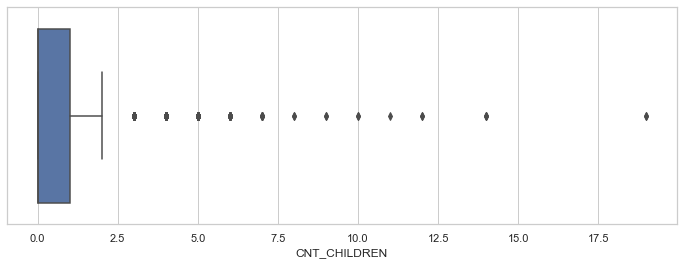

In [39]:
plt.figure(figsize=(12,4))
sns.set(style="whitegrid")
sns.boxplot(application_data.CNT_CHILDREN)
plt.show()

Here as shown in the above graph, there are values more than 10,  humans do not have so many children hence we will consider them as an outlier.


#### AMT_INCOME_TOTAL

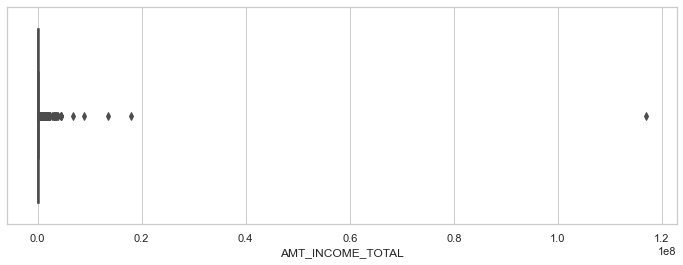

In [40]:
plt.figure(figsize=(12,4))
sns.set(style="whitegrid")
sns.boxplot(application_data.AMT_INCOME_TOTAL)
plt.show()

As max amount is way above the mean and 75th percentile hence we can consider there are outliers present in this column.


In [41]:
#check the 95 percentile of data.
application_data.AMT_INCOME_TOTAL.quantile(.95)

337500.0

As we can see, 95% of data lies below 337500 so we can consider AMT_INCOME_TOTAL has outliers.

#### DAYS_EMPLOYED

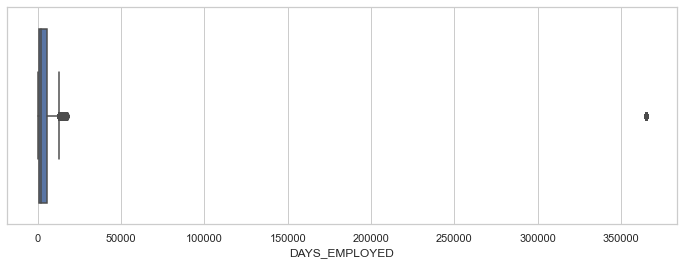

In [42]:
plt.figure(figsize=(12,4))
sns.set(style="whitegrid")
sns.boxplot(application_data.DAYS_EMPLOYED)
plt.show()

One value which is 365243 is far away from the max value in the data. We can consider this as an outlier. 

#### OBS_30_CNT_SOCIAL_CIRCLE

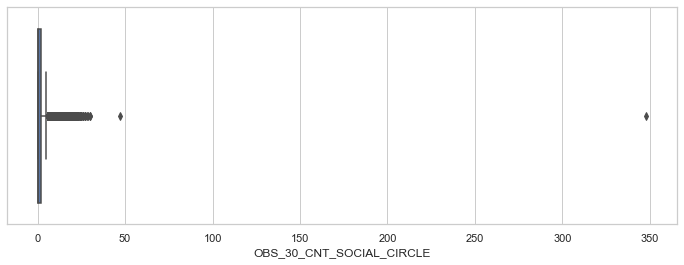

In [43]:
plt.figure(figsize=(12,4))
sns.set(style="whitegrid")
sns.boxplot(application_data.OBS_30_CNT_SOCIAL_CIRCLE)
plt.show()

We can clearly see in above graph, value near 50 and 350 is clearly an outlier.

#### AMT_REQ_CREDIT_BUREAU_MON

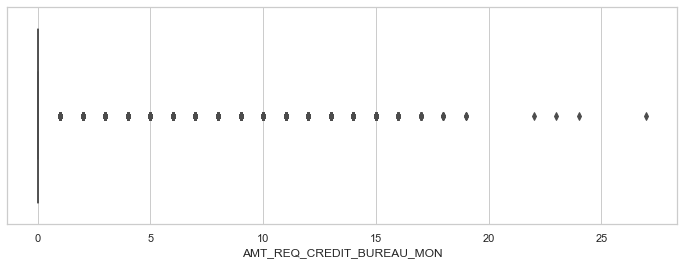

In [44]:
plt.figure(figsize=(12,4))
sns.set(style="whitegrid")
sns.boxplot(application_data.AMT_REQ_CREDIT_BUREAU_MON)
plt.show()

We can clearly see in above graph, value above 20 can be considered as an outlier.

# Binning

#### Approach- 

- We will check continuous variable in data set and bin for better visualization and analysis.
- After exploring all the continuous variables we have found below column can be binned together -
    - AMT_INCOME_TOTAL
    - DAYS_BIRTH
    - CNT_FAM_MEMBERS
    - FLOORSMAX_AVG
    - TOTALAREA_MODE
    - FLOORSMAX_MEDI

###### AMT_INCOME_TOTAL

Here we will add one more column as AMT_INCOME_TOTAL_cat and assign the values on the basis of AMT_INCOME_TOTAL column.

In [45]:
application_data['AMT_INCOME_TOTAL_cat'] = pd.cut(application_data.AMT_INCOME_TOTAL, [5000.0, 100000.0,300000.0,500000.0,1000000.0, 10000000.0], labels = ['low','avg','above_avg', 'high', 'very_high'])

In [46]:
application_data.AMT_INCOME_TOTAL_cat.value_counts()

avg          221074
low           63698
above_avg     20037
high           2452
very_high       247
Name: AMT_INCOME_TOTAL_cat, dtype: int64

Above data indicates mostly application is of low or avg income group

###### DAYS_BIRTH

Here we will add one more column as Age and compute the values on the basis of DAYS_BIRTH column.

In [47]:
application_data['Age'] = round((application_data.DAYS_BIRTH)/365,0)

In [48]:
application_data['Age'] = pd.cut(application_data.Age, [18.0, 30.0,40.0,50.0,60.0,100.0], labels = ['18-30','30-40','40-50', '50-60', '60+'])


In [49]:
application_data.Age.value_counts()

30-40    82770
40-50    75509
50-60    67955
18-30    48869
60+      32408
Name: Age, dtype: int64

Above data indicates, loan application is filled with all age group people.

In [50]:
application_data

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
0           100002      1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801      9461.0          637.0             3648.0           2120.0          1              1               0                1          1          0        Laborers              1.0                    2                           2                  WEDNESDAY                       10                          0                          0                           0                      0                      0                       0  Business Entity Type 3      0.262949      0.139376                       0.9722         0.0833                        0.9722          0.0833                        0.9722          0.0833          0.0149                  No                       2.0   
1           100003      0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family         State servant               Higher education               Married  House / apartment                    0.003541     16765.0         1188.0             1186.0            291.0          1              1               0                1          1          0      Core staff              2.0                    1                           1                     MONDAY                       11                          0                          0                           0                      0                      0                       0                  School      0.622246           NaN                       0.9851         0.2917                        0.9851          0.2917                        0.9851          0.2917          0.0714                  No                       1.0   
2           100004      0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032     19046.0          225.0             4260.0           2531.0          1              1               1                1          1          0        Laborers              1.0                    2                           2                     MONDAY                        9                          0                          0                           0                      0                      0                       0              Government      0.555912      0.729567                          NaN            NaN                           NaN             NaN                           NaN             NaN             NaN                 NaN                       0.0   
3           100006      0         Cash loans           F            N               

# Imbalance Data

In [51]:
application_data.TARGET.value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

There is clearly imbalance in data. Person who is going to pay the loan EMI are very high(92%) and those who are going to default are less(8%)

### Divide data in two data-frames as per Tagert value

In [52]:
application_data_Target_0 = application_data[application_data['TARGET'] == 0]
application_data_Target_1 = application_data[application_data['TARGET'] == 1]

In order to perform Univariate analyis on categorical variables in the data set for both target variable 0 and 1, we have choosen few columns and store them in variable cat_cols and performed the univariate analysis.

## Univariate Analysis - Categorical

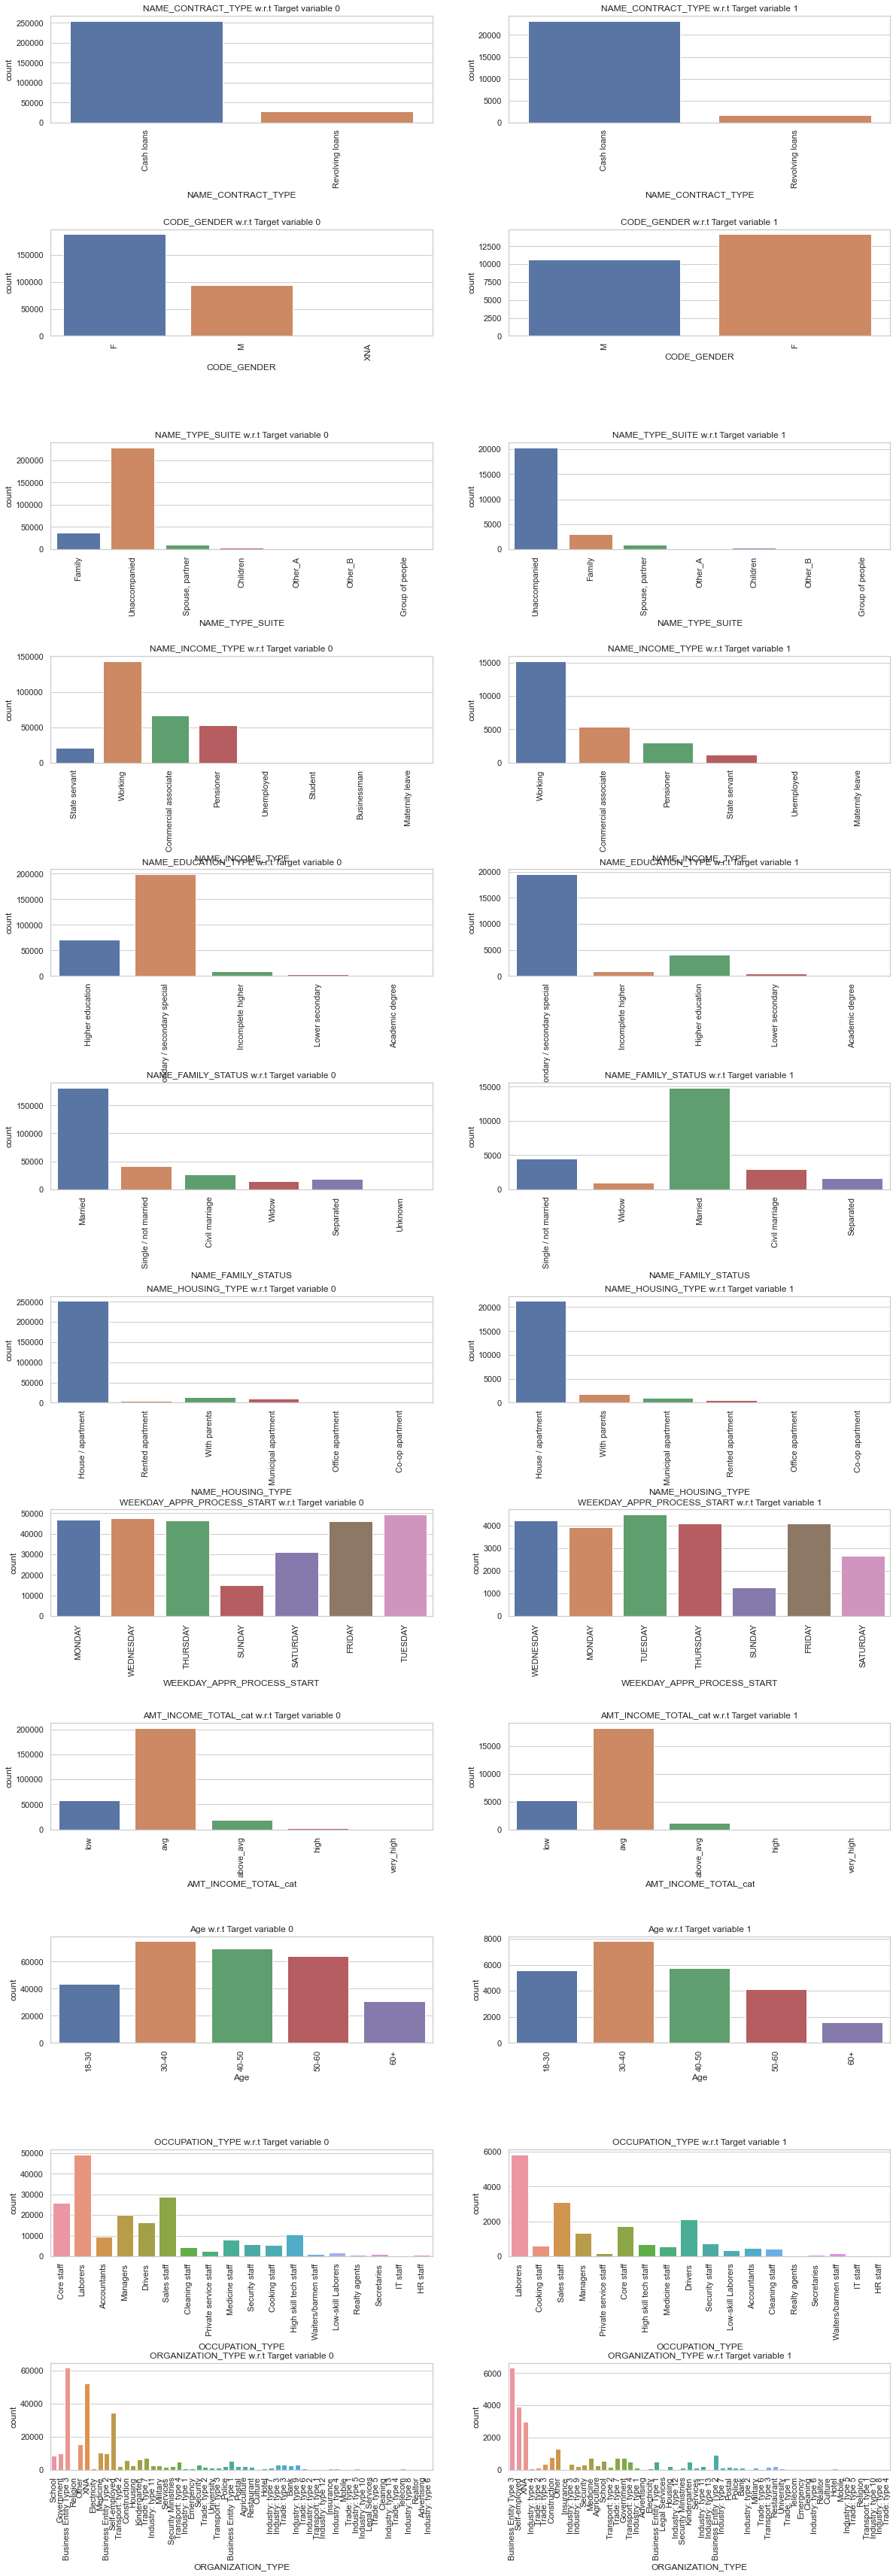

In [53]:
cat_cols = ['NAME_CONTRACT_TYPE','CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'AMT_INCOME_TOTAL_cat','Age','OCCUPATION_TYPE', 'ORGANIZATION_TYPE'];

rowCnt = len(cat_cols)
colCnt = 2
subCnt = 1 # initialize plot number

plt.figure(figsize = (20,60))
for col in cat_cols:
    plt.subplot(rowCnt, colCnt, subCnt)
    sns.countplot(application_data_Target_0[col])
    plt.title(col + " w.r.t Target variable 0")
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace = 1.0)
    
    subCnt = subCnt+1
    
    plt.subplot(rowCnt, colCnt, subCnt)
    sns.countplot(application_data_Target_1[col])
    plt.title(col + " w.r.t Target variable 1")
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace = 1.0)
    subCnt = subCnt+1

###### Insights of each plots draw above:

###### 1. Type of applications in application data (NAME_CONTRACT_TYPE)
- For Target variable 0 (People who have paid the laon) approx 90% application are for cash loans and only 10% application is for revolving loans. 
- For Target variable 1 (People who have defaulted) approx 94% application are for cash loans and only 5% application is for revolving loans. 

###### 2. Type of gender in application form (CODE_GENDER)
- Female clients are almost double than male clients in applicaiton data. People who have repaid the loans are approx 65% female and 35% are male.
- In default applications, 57% application are of female and 43% applications are of male clients.

###### 3. Accompained in application data (NAME_TYPE_SUITE)
- For both Target variable 0 and 1, more than 80% people were unaccompained, approx 10% were with Family and 3% were with spouse while filing the applications.

###### 4. Income source of clients while filing the application (NAME_INCOME_TYPE)
- People who have paid the loans are 50% working, 23% commercial associates and 18% are pensioners.
- People who have defaulted the loans are 61% working, 22% commercial associates and 12% are pensioners.

###### 5. Education of clients while filing the application (NAME_EDUCATION_TYPE)

- People who have paid the loans have 50% Secondary / secondary special education while 25% have higher education and 3% have incomplete education.
- People who have defaulted the loans have 78% Secondary / secondary special education while 16% have higher education and 3% have incomplete education.

###### 6. Type of family (NAME_FAMILY_STATUS)
- People who have paid the loans are 64% married, 14% single and 9% civil marriage type. 
- People who have defaulted the loans are 60% married, 18% single and 12% civil marriage type. 

###### 7. Type of house clients live in (NAME_HOUSING_TYPE)
- People who have paid the loans are 89% living in House / apartment, 4.6% with parents and 3.6% in municipal appartments 
- People who have defaulted the loans are approx 85% living in House / apartment, 7% with parents and 3.8% in municipal appartments 

###### 8. Days of the week application started (WEEKDAY_APPR_PROCESS_START)
- Both who have paid theie loans and defaulted have started their application mostly on weekdays.

###### 9. Type od income of clients (AMT_INCOME_TOTAL_cat)
- Both who have paid theie loans and defaulted are mostly in avg, low and above_avg income group.

###### 10. Age of clients (Age)
- People who have paid the loans are 26.5% are in 30-40 age group, 24.6% are in 40-50 age group and 26.5% are in 50-60 age group 
- People who have paid the loans are 31% are in 30-40 age group, 23% are in 40-50 age group and 22% are in 18-30 age group 

###### 11. Occupation of applicants (OCCUPATION_TYPE)
- Laborers, sales staffs and core staffs are paid their loans while laborers, sales staffs and drivers have defaulted their loans. 

###### 12. Type of organization (ORGANIZATION_TYPE)
- Clients work in Business, self employed and medicine have paid their loan while clients work in business and self employed have defaulted their loans. 

# Univariate Analysis - Continuous

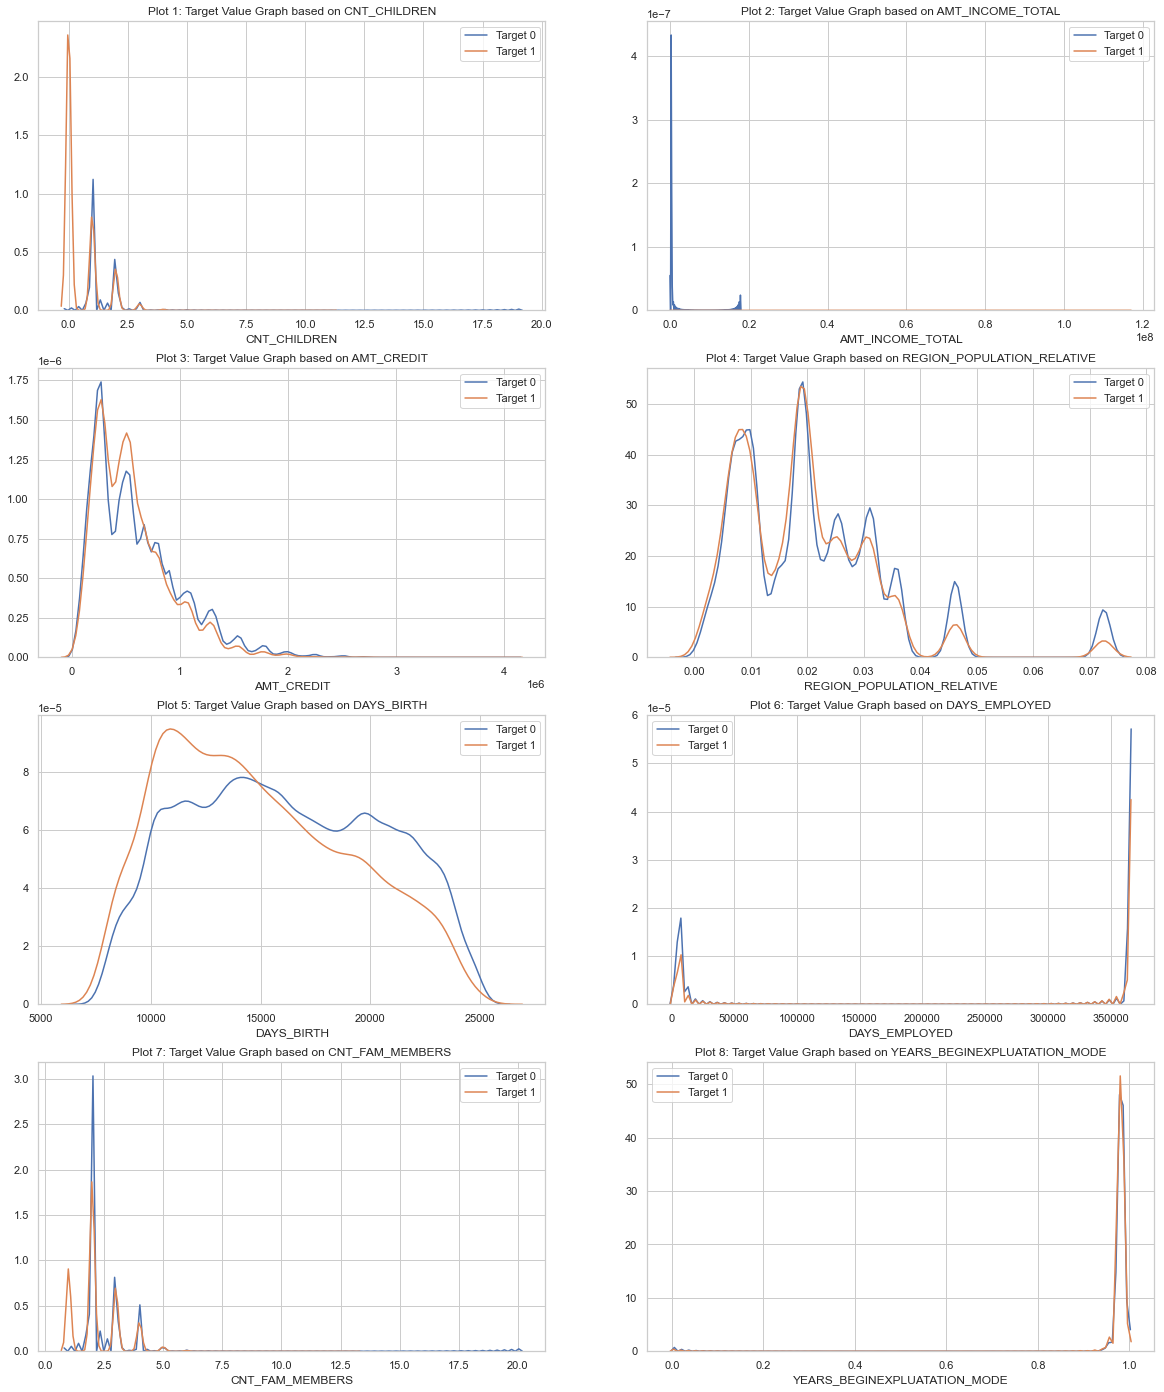

In [54]:
num_cols = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT','REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 
'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'YEARS_BEGINEXPLUATATION_MODE'];

rowCnt = len(num_cols)
colCnt = 2
subCnt = 1 # initialize plot number

plt.figure(figsize = (20,50))
for col in num_cols:
    plt.subplot(rowCnt, colCnt, subCnt)
    plt.title('Plot '+str(subCnt) + ': Target Value Graph based on '+col)
    sns.distplot(application_data_Target_0[col], hist=False, label='Target 0')
    sns.distplot(application_data_Target_1[col], hist=False, label='Target 1')
    subCnt = subCnt+1

###### Insights of each plots draw above:

###### Plot 1 : Target Value Graph based on CNT_CHILDREN
- This graph shows the variation of target: 0 & 1based on children count category.
- As per graph, for target 0 the count is much higher than target 1 values in the starting range.
- As the range increase pattern doesn’t show much variance for both values.
- In between range 0.0-2.5, target 1 values are higher than 0 but after that again more or less variance is same for both values.

###### Plot 2 : Target Value Graph based on AMT_INCOME_TOTAL
- Hardly data for target-1 value has been in the graph.
- Most of the data for target-0 has been lied between 0.0-0.2 range only.

###### Plot 3 : Target Value Graph based on AMT_CREDIT
- This graph shows the variation of target: 0 & 1based on amount credit category.
- As per graph, for target 0 the count is slightly higher than target 1 values in the range starting from 0.
- In between range 0-10Lc, for target 0 amount variance pattern is more than target 1.  It means amount variant more for target 0 data.
- As the range increase pattern doesn’t show much variance for both values.

###### Plot 4 : Target Value Graph based on REGION_POPULATION_RELATIVE
- This graph shows the variation of target: 0 & 1based on normalized population of region where client lives (higher number means the client lives in more populated region).
- For both target values, graph variance pattern is nearly equal.
- As the range increase, count for target 0 is higher than 1.
- We can say that, for both target values normalized population of region division is same. 

###### Plot 5 : Target Value Graph based on DAYS_BIRTH
- This graph shows the variation of target: 0 & 1based on client's age in days at the time of application.
- As per graph, for target 0: most application for ~11000 days (~28 year) and count decrease from 20000 days (~55 year).
- As per graph, for target 1: most application for ~14000 days (~38 year) and count decrease from ~22000 days (~60 year).
- We can say that more application of younger age are for target 0 whereas for senior citizens target 1 applications are higher.

###### Plot 6 : Target Value Graph based on DAYS_EMPLOYED
- For both target values either data lies between 0-50K or above 350K
- Variance pattern is same for both the target value, due to count differnece the Target-0 graph showing the highest range.

###### Plot 7 : Target Value Graph based on CNT_FAM_MEMBERS
- Highest number of family count for both target is 2.
- Due to inmbalance data target 0 value range is highest.
- Most of the data for both target valuyes is lies between 0 and 5.

###### Plot 8 : Target Value Graph based on YEARS_BEGINEXPLUATATION_MODE
- Graph variance is same for both target values
- Highest range of graph belongs to target 1, which is slightly high with target 0 values.

# Bivariate Analysis: Categorical - Categorical

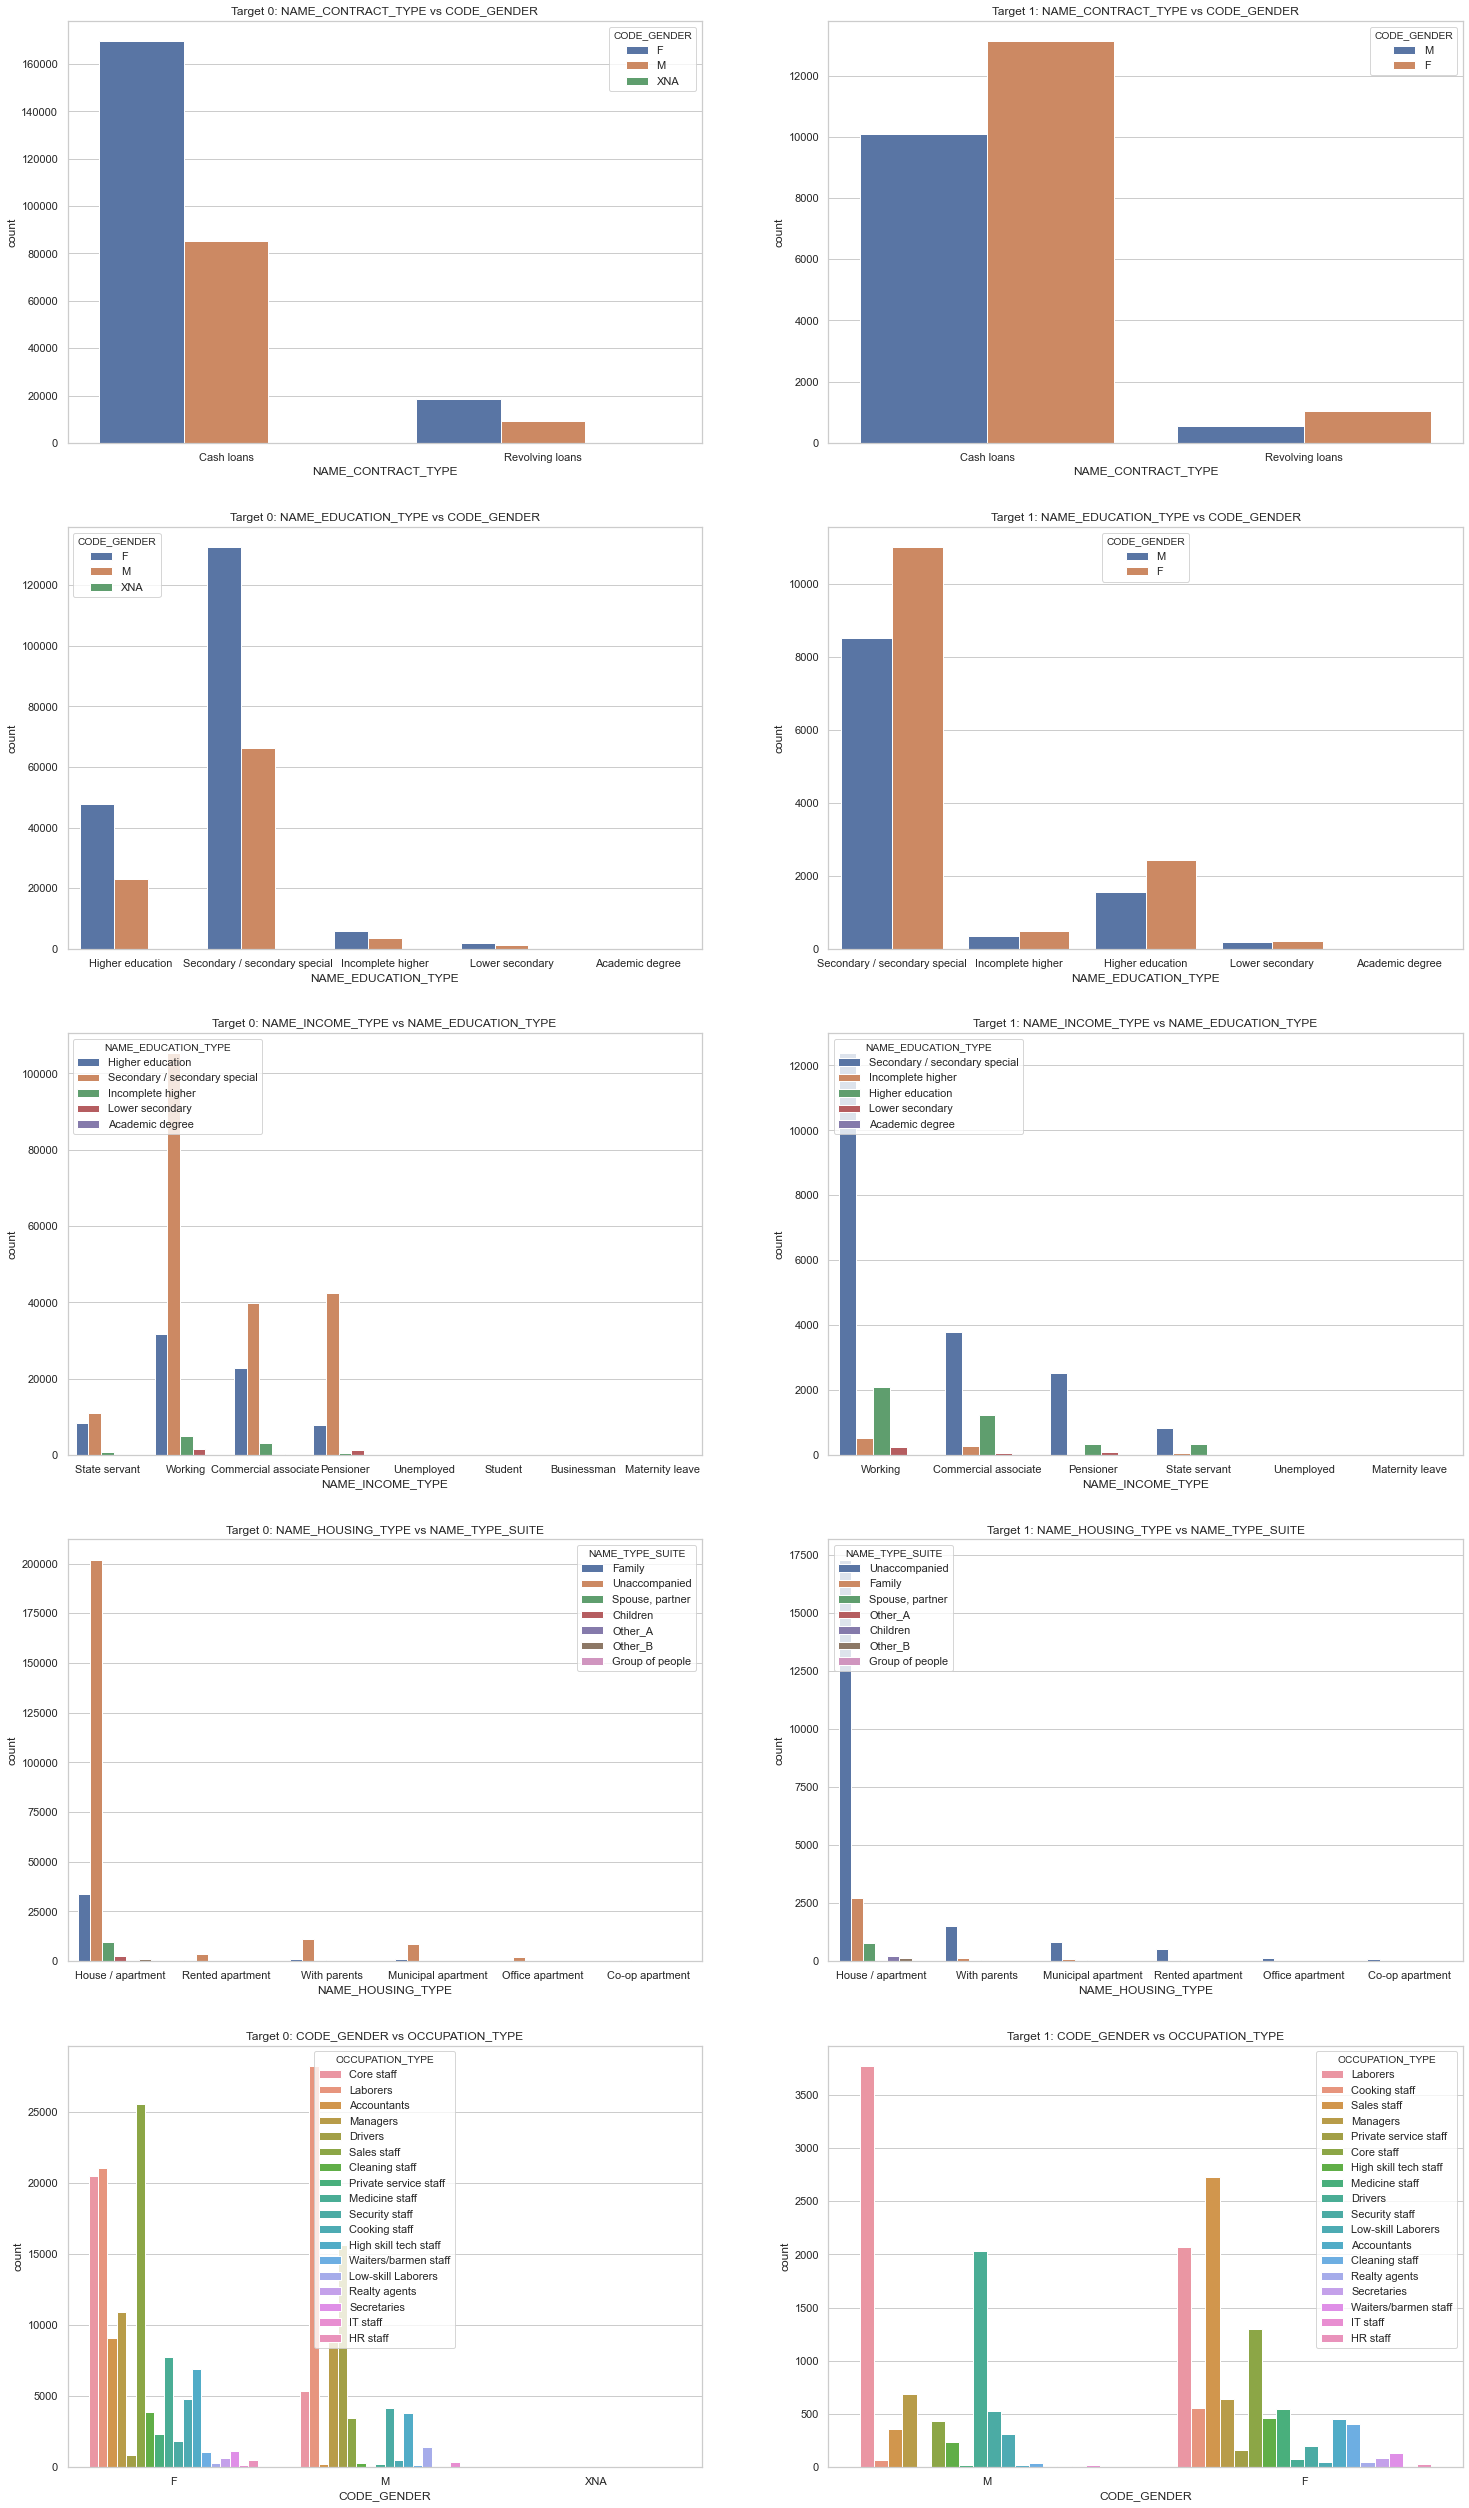

In [55]:
cat_cols = ['NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'NAME_HOUSING_TYPE', 'CODE_GENDER'];
hue_cols = ['CODE_GENDER', 'CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE'];

rowCnt = len(cat_cols)
colCnt = 2
subCnt = 1 # initialize plot number

plt.figure(figsize = (25,45))
for col,hue_data in zip(cat_cols, hue_cols):
    plt.subplot(rowCnt, colCnt, subCnt)
    plt.title('Target 0: '+col +' vs '+ hue_data)
    sns.countplot(x=col, hue=hue_data, data= application_data_Target_0)
    
    subCnt = subCnt+1
    
    plt.subplot(rowCnt, colCnt, subCnt)
    plt.title('Target 1: '+col +' vs '+ hue_data)
    sns.countplot(x=col, hue=hue_data, data= application_data_Target_1)
    subCnt = subCnt+1

###### Insights of each plots draw above:

###### 1. NAME_CONTRACT_TYPE vs CODE_GENDER
- This graph shows the difference between loan Contract type and Gender for both target values.
- As per graph, it is clearly shown for both target values, Female gender applied loan application than male. 
- Also, count difference for Female and Male gender applications is higher for Target0- Cash Loan types.
- For resolving loans type count is lower but Female are leading here as well.

###### 2. NAME_EDUCATION_TYPE vs CODE_GENDER
- This graph shows the difference between loan Education type and Gender for both target values.
- As per graph, it is clearly shown for both target values, people who have Secondary/senior secondary education applied more loan application than all other categories.
- Here, also female application count is higher than male.
- The difference count for male and female is higher for target 0 values.

###### 3. NAME_INCOME_TYPE vs NAME_EDUCATION_TYPE
- This graph shows the difference between loan Education type and Income type for both target values.
- As per graph, it is clearly shown for both target values, who lies in working income and Secondary education are highest.
- There is very smaller number of application for unemployed, businessman, maternity leave or student category.
- For target value 0 count is nearly equal for secondary education of commercial associate and pensioner whereas for target1 there is good difference.

###### 4. NAME_HOUSING_TYPE vs NAME_TYPE_SUITE
- This graph shows the difference between loan Housing type and Family type for both target values.
- As per graph, it is clearly shown for both target values, people who have their own house/apartment and unaccompanied are highest in number.
- For other categories, count is very less and nearly equal for both target values.

###### 5. CODE_GENDER vs OCCUPATION_TYPE
- This graph shows the difference between loan Occupation type and Gender for both target values.
- As per graph, Males who have laborers occupation have highest application.
- For target1 application count is higher than target 0 for each occupation type.

# Bivariate Analysis: Categorical - Continuous

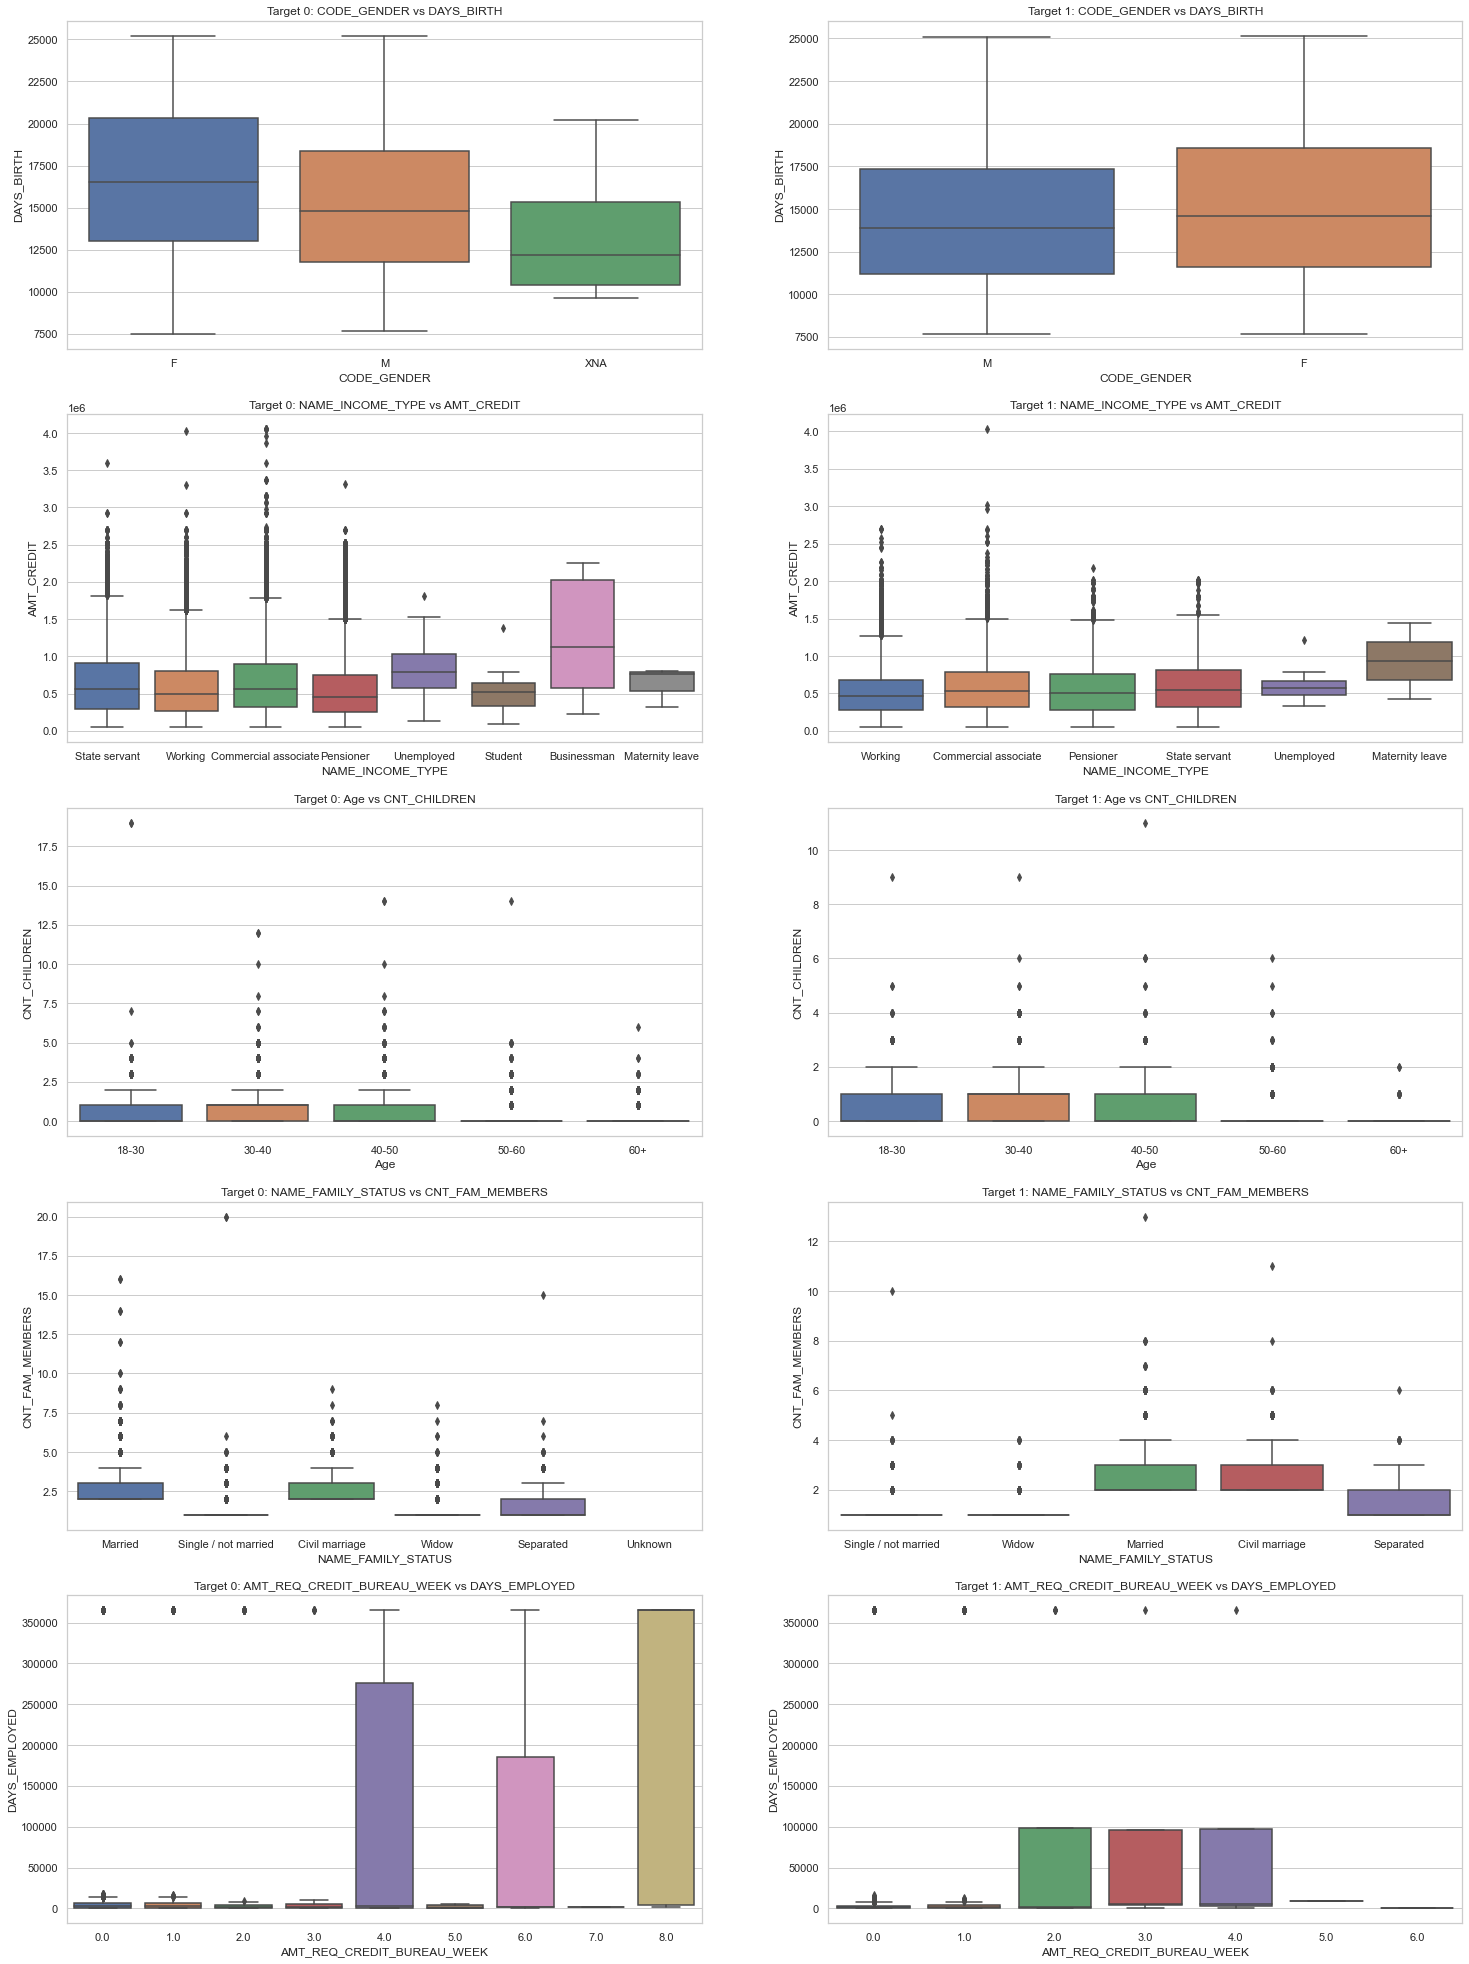

In [56]:
cat_cols = ['CODE_GENDER', 'NAME_INCOME_TYPE', 'Age', 'NAME_FAMILY_STATUS', 'AMT_REQ_CREDIT_BUREAU_WEEK'] 
num_cols = ['DAYS_BIRTH', 'AMT_CREDIT', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'DAYS_EMPLOYED'];

rowCnt = len(cat_cols)
colCnt = 2
subCnt = 1 # initialize plot number

plt.figure(figsize = (25,35))
for cat, num in zip(cat_cols, num_cols):
    plt.subplot(rowCnt, colCnt, subCnt)
    plt.title('Target 0: '+cat +' vs '+ num)
    sns.boxplot(application_data_Target_0[cat], application_data_Target_0[num])
    
    subCnt = subCnt+1
    
    plt.subplot(rowCnt, colCnt, subCnt)
    plt.title('Target 1: '+cat +' vs '+ num)
    sns.boxplot(application_data_Target_1[cat], application_data_Target_1[num])
    subCnt = subCnt+1

###### Insights of each plots draw above:

###### 1. CODE_GENDER vs DAYS_BIRTH
- For both male and female minimum line is same of each target value.
- Median value of female target 0 is highest.
- As per graph, data imbalance for target 0 is clearly seen as null records are there.

###### 2. NAME_INCOME_TYPE vs AMT_CREDIT
- Highest median for Target 0 value is for Businessman income type people.
- Highest median for Target 1 value is for Maternity leave income type people
- There are more outliers for for commercial associate category for both target values.
- Number of categorical classification is high for target 0 value.

###### 3. Age vs CNT_CHILDREN
- Maximum range for each age group of each target value is same.
- The highest outliers values is for 40-50 age group of target 0 value.
- The target 1 data is equally disturbed for category 18-30, 30-40 and 40-50.

###### 4. NAME_FAMILY_STATUS vs CNT_FAM_MEMBERS
- Outliers for Married category is highest for both target values.
- For target 1 maximum number of married and civil marriage is same.
- For single and window category the valid family count member is zero. Also, having few outlier count for both target values.

###### 5. AMT_REQ_CREDIT_BUREAU_WEEK vs DAYS_EMPLOYED
- Range for target 0 variable is between 0-8, while for taregt 1 is 0-6.
- There are more outliers for target 1 values than 0.

# Bivariate Analysis: Continuous - Continuous

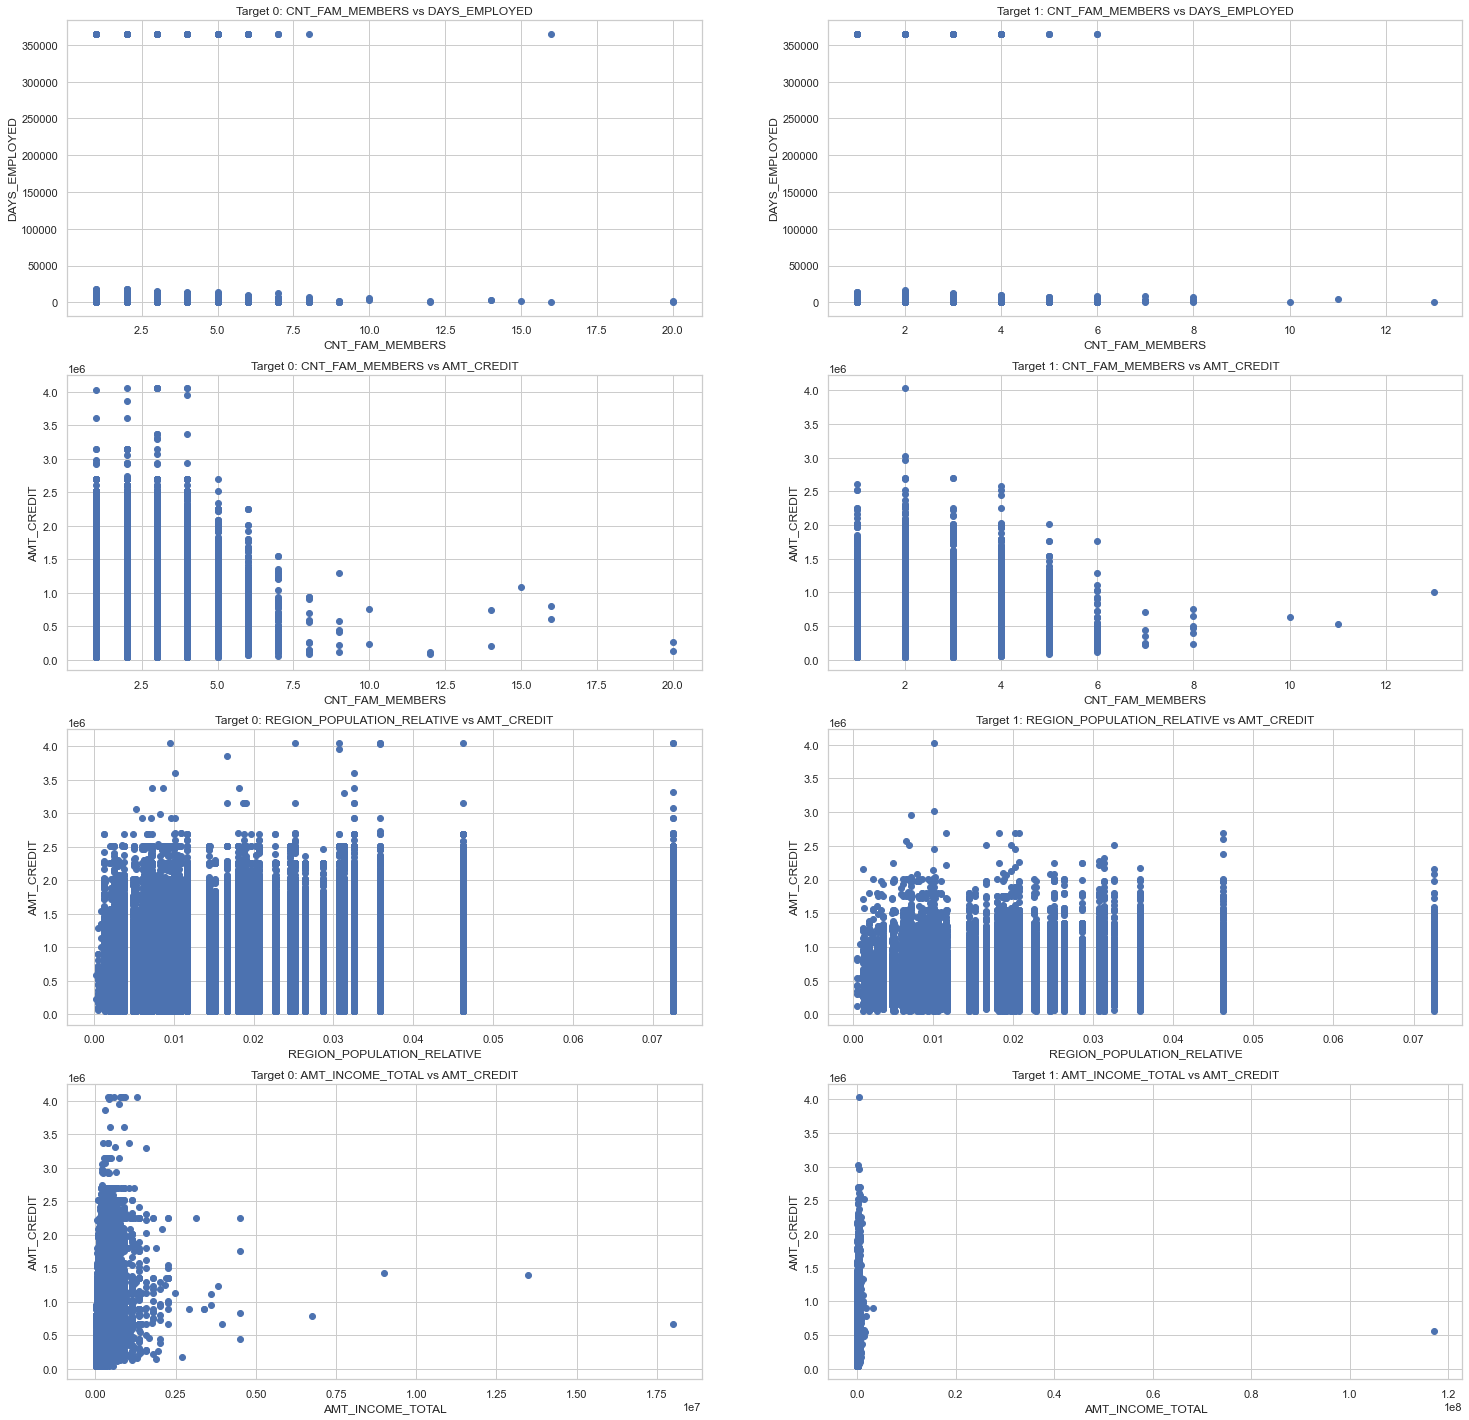

In [57]:
num_cols1 = ['CNT_FAM_MEMBERS', 'CNT_FAM_MEMBERS', 'REGION_POPULATION_RELATIVE', 'AMT_INCOME_TOTAL'];
num_cols2 = ['DAYS_EMPLOYED', 'AMT_CREDIT', 'AMT_CREDIT', 'AMT_CREDIT'];

rowCnt = len(num_cols1)
colCnt = 2
subCnt = 1 # initialize plot number

plt.figure(figsize = (25,25))
for num1, num2 in zip(num_cols1, num_cols2):
    plt.subplot(rowCnt, colCnt, subCnt)
    plt.title('Target 0: '+num1 +' vs '+ num2)
    plt.xlabel(num1)
    plt.ylabel(num2)
    plt.scatter(application_data_Target_0[num1], application_data_Target_0[num2])
    
    subCnt = subCnt+1
    
    plt.subplot(rowCnt, colCnt, subCnt)
    plt.title('Target 1: '+num1 +' vs '+ num2)
    plt.xlabel(num1)
    plt.ylabel(num2)
    plt.scatter(application_data_Target_1[num1], application_data_Target_1[num2])
    subCnt = subCnt+1

###### Insights of each plots draw above:

###### 1. CNT_FAM_MEMBERS vs DAYS_EMPLOYED
- This graph shows the difference between family member count and how many days before the application the person started current employment.
- The variance pattern is almost same for both target values.
- For family member range 15-17.5 and highest range of employed days  we have few application for target 0 but not for target 1.
- As per graph days employed range goes to 350K days(~958 years) which is impossible range. It means either we don’t have proper data for this and consider as default value or incorrect data has been entered.

###### 2. CNT_FAM_MEMBERS vs AMT_CREDIT
- This graph shows the difference between family member count and loan amount credit
- The variance pattern is almost same for both target values and the difference is due to count of applications.
- As per graph the family member count range for target 0 varies from 0-20+ whereas for target 1 it is 0-12+. 
- The count for highest credit amount ie. 40L is higher for target 0 value.
- Mostly application are from family member range of 0-5 and loan amount from 5-25 Lc.

###### 3. REGION_POPULATION_RELATIVE vs AMT_CREDIT
- This graph shows the difference between region population and amount credit.
- The variance pattern is almost same for both target values and the difference is due to count of applications.
- As per graph, people who lives in more populated area have lesser application than least population area.
- Mostly application for 0.00-0.04 population range and almost same loan credit amount has been seen.

###### 4. AMT_INCOME_TOTAL vs AMT_CREDIT
- This graph shows the difference between person total income and loan amount.
- The variance pattern for target 0 is more than target 1 due to the application count difference.
- There are very few applications who have loan credit amount range from 30-40Lc for target 1.
- Similarly, for target 0 total income variance is higher than target 1.

# Correlation

### For Target 0 - Correlation

In [58]:
corr = application_data_Target_0.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_df = corr.unstack().reset_index()
corr_df.columns = ['Var1', 'Var2','Correlation']
corr_df.dropna(subset=['Correlation'], inplace=True)
corr_df['Correlation_Abs'] = corr_df['Correlation'].abs()
corr_df.sort_values(by='Correlation_Abs', ascending=False, inplace=True)
corr_df.head(10)

Var1                          Var2  Correlation  Correlation_Abs
666      OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE     0.998508         0.998508
576                FLOORSMAX_MEDI                 FLOORSMAX_AVG     0.997018         0.997018
547  YEARS_BEGINEXPLUATATION_MEDI   YEARS_BEGINEXPLUATATION_AVG     0.993582         0.993582
578                FLOORSMAX_MEDI                FLOORSMAX_MODE     0.988153         0.988153
143               AMT_GOODS_PRICE                    AMT_CREDIT     0.987250         0.987250
520                FLOORSMAX_MODE                 FLOORSMAX_AVG     0.985603         0.985603
491  YEARS_BEGINEXPLUATATION_MODE   YEARS_BEGINEXPLUATATION_AVG     0.971032         0.971032
549  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE     0.962064         0.962064
309               CNT_FAM_MEMBERS                  CNT_CHILDREN     0.878571         0.878571
144               AMT_GOODS_PRICE                   AMT_ANNUITY     0.776686         0.776686

### For Target 1 - Correlation

In [59]:
corr = application_data_Target_1.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_df = corr.unstack().reset_index()
corr_df.columns = ['Var1', 'Var2','Correlation']
corr_df.dropna(subset=['Correlation'], inplace=True)
corr_df['Correlation_Abs'] = corr_df['Correlation'].abs()
corr_df.sort_values(by='Correlation_Abs', ascending=False, inplace=True)
corr_df.head(10)

Var1                          Var2  Correlation  Correlation_Abs
666      OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE     0.998269         0.998269
576                FLOORSMAX_MEDI                 FLOORSMAX_AVG     0.997187         0.997187
547  YEARS_BEGINEXPLUATATION_MEDI   YEARS_BEGINEXPLUATATION_AVG     0.996124         0.996124
578                FLOORSMAX_MEDI                FLOORSMAX_MODE     0.989195         0.989195
520                FLOORSMAX_MODE                 FLOORSMAX_AVG     0.986594         0.986594
143               AMT_GOODS_PRICE                    AMT_CREDIT     0.983103         0.983103
491  YEARS_BEGINEXPLUATATION_MODE   YEARS_BEGINEXPLUATATION_AVG     0.980466         0.980466
549  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE     0.978073         0.978073
309               CNT_FAM_MEMBERS                  CNT_CHILDREN     0.885484         0.885484
144               AMT_GOODS_PRICE                   AMT_ANNUITY     0.752699         0.752699

###### Insights of Correlation Data - 
- Top 3 correlation for Target 0 and 1 are same with a slight differnce of correlation value – 
    - OBS_60_CNT_SOCIAL_CIRCLE with OBS_30_CNT_SOCIAL_CIRCLE
    - FLOORSMAX_MEDI with FLOORSMAX_AVG
    - YEARS_BEGINEXPLUATATION_MEDI with YEARS_BEGINEXPLUATATION_AVG

# Merge Application Data + Previous Application data

In [60]:
# load the previous application data for analysis.
previous_application=pd.read_csv("previous_application.csv")

Both application data and previous application data has common column SK_ID_CURR. We have merged(left merge) both the data on SK_ID_CURR keeping previous data on left and application data on right and store in new dataframe merge_df

In [61]:
#merge both previous data and application data
merge_df = pd.merge(previous_application, application_data, on='SK_ID_CURR', how='left')

In [62]:
# check no of rows and columns after merging the data
merge_df.shape

(1670214, 119)

In [63]:
merge_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE_x  AMT_ANNUITY_x  AMT_APPLICATION  AMT_CREDIT_x  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE_x WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE_x NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL TARGET NAME_CONTRACT_TYPE_y CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_y  AMT_ANNUITY_y  AMT_GOODS_PRICE_y NAME_TYPE_SUITE_y      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0     2030495      271877       Consumer loans       1730.430          17145.0       17145.0               0.0            17145.0                     SATURDAY                         15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP               NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0      0           Cash loans           F            N               Y           1.0          225000.0      533668.5        25803.0           477000.0     Unaccompanied         State servant              Incomplete higher            Married  House / apartment   
1     2802425      108129           Cash loans      25188.615         607500.0      679671.0               NaN           607500.0                     THURSDAY                         11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP     Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0      0      Revolving loans           F            N               N           0.0           90000.0      135000.0         6750.0           135000.0            Family  Commercial associate  Secondary / secondary special     Civil marriage  House / apartment   
2     2523466      122040           Cash loans      15060.735         112500.0      136444.5               NaN           112500.0                      TUESDAY                         11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP   Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0      0           Cash loans           F            N               Y           3.0           40500.0      284400.0        16456.5           225000.0   Spouse, partner               Working  Secondary / secondary special            Married  House / apartment   
3     2

# Univariate Analysis - Categorical Variable (Previous Data)

we have already analysed univariate categorical variables from application data so we are only taking important columns from previous application and doing the analysis.

In [69]:
# import plotly express
import plotly.express as px
from plotly.offline import iplot, init_notebook_mode
from plotly.subplots import make_subplots
init_notebook_mode()

We have stored categorical columns from previous application and store them in cat_cols and run a loop to draw pie plot for each categorical variable. 

###### PS: if pie plots doesn't load then please run the complete code or check the attached screenshot (plotly_plots.png) for reference.

In [77]:
cat_cols = ['NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START','NAME_CONTRACT_STATUS','NAME_TYPE_SUITE','NAME_CLIENT_TYPE','CHANNEL_TYPE'];


plt.figure(figsize = (20,45))
for col in cat_cols:
    df = previous_application[col].value_counts().reset_index()
    fig = px.pie(df, values=col, names='index', title= col ,labels={'index':'index'})
    iplot(fig)

<Figure size 1440x3240 with 0 Axes>

###### Insights of each plots draw above:

###### 1. Contract product type of previous application (NAME_CONTRACT_TYPE)
- As per graph these are the following division - 
    - Approved: 62.1% times
    - Cancelled: 18.9 % times
    - Refused: 17.4 % times
    - Unused offer: 1.58 % times
- Which means more than half of applications are approved successfully.

###### 2. On which day process was started (WEEKDAY_APPR_PROCESS_START)
- Most of the application were processed on weekdays.
- As per graph, ~25% of total application processed on weekend.
- Application processing percentage of any day on weekday is almost equal.

###### 3. Contract was approved or not in previous application: (NAME_CONTRACT_STATUS)
- Approved: 62.1 % times
- Cancelled: 18.9 % times
- Refused: 17.4 % times
- Unused offer: 1.58 % times

###### 4. Accoumpained in previous application (NAME_TYPE_SUITE )
- 60% people were unaccompained while filing the applications.
- 25% were with family and 8% were with spouse.

###### 5. Whether applicants applied for first time or repeated (NAME_CLIENT_TYPE)
- 77% previous applications were repeated.
- While only 18% were new applications. 

###### 6. Source of the previous application (CHANNEL_TYPE)
- 43% applications were filed through credit & cash offices, which is highest.
- 29.6% were filed through country-wide.
- Other channel type consists of remaining channel type which is around less than equal to 12%.

# Univariate Analysis - Continuous Variable (Previous Data)

- We have already analysed univariate continuous variables from application data so we are only taking important columns from previos application and doing the analysis.

- We have stored continuous columns from previous application and store them in num_cols and run a loop to draw dist plot for each continuous variable.

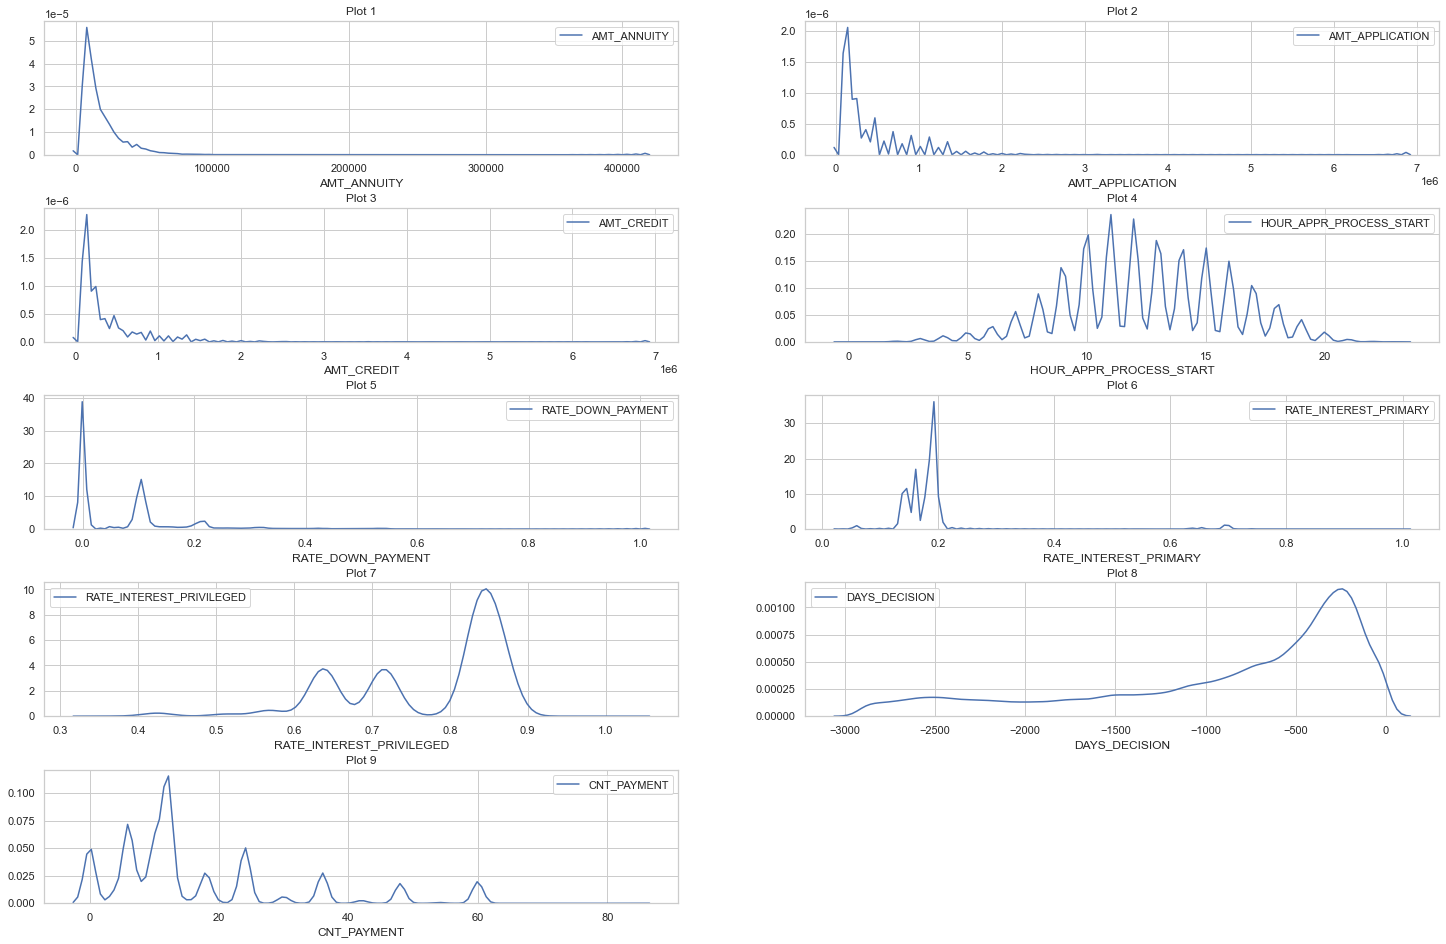

In [66]:
num_cols = ['AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'HOUR_APPR_PROCESS_START',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'DAYS_DECISION',
 'CNT_PAYMENT'];

rowCnt = len(num_cols)
colCnt = 2
subCnt = 1 # initialize plot number

plt.figure(figsize = (25,30))
for col in num_cols:
    plt.subplot(rowCnt, colCnt, subCnt)
    plt.title('Plot '+str(subCnt))
    sns.distplot(previous_application[col], hist=False, label=col)
    plt.subplots_adjust(hspace = 0.4)
    subCnt = subCnt+1

###### Insights of each graphs draw above:

###### Plot -1: AMT_ANNUITY 
 - Most of the application has annuity amount less than 1 lac. While maximum application has 20-30 thousand annuity amount. 

###### Plot -2: AMT_APPLICATION
- Loan application amount were upto 70 lacs but most of the clients taken loan upto 5 lac. 

###### Plot -3: AMT_CREDIT
- Credit amount were upto 70 lacs but mosstly upto 5 lac amounts were credited.

###### Plot -4: HOUR_APPR_PROCESS_START
- Most of the applications were processed between 5-15 hours.

######  Plot -5: RATE_DOWN_PAYMENT
- Down payment rate varies between 0 to 1 but majority had between 0 to 0.1

######  Plot -6: RATE_INTEREST_PRIMARY
- Interest rate varies between 0 to 1 but majority had between 0.1 to 0.2

######  Plot -7: RATE_INTEREST_PRIVILEGED
- Interest rate varies between 0.3 to 1 but 0.8 to 0.9 had the highest.

######  Plot -8: DAYS_DECISION
- Application were approved in 0 to 3000 days. But most of the application were approved in less than a year.

######  Plot -9: CNT_PAYMENT
- It varies between 0 to 80 but maximum applicatio nhad between 0 to 20.

# Bivariate Analysis: Categorical - Categorical (Merge Data)

We have considered the categorical variable(cat_cols) from application data and plot them against the Target variable(NAME_CONTRACT_STATUS) of previous application

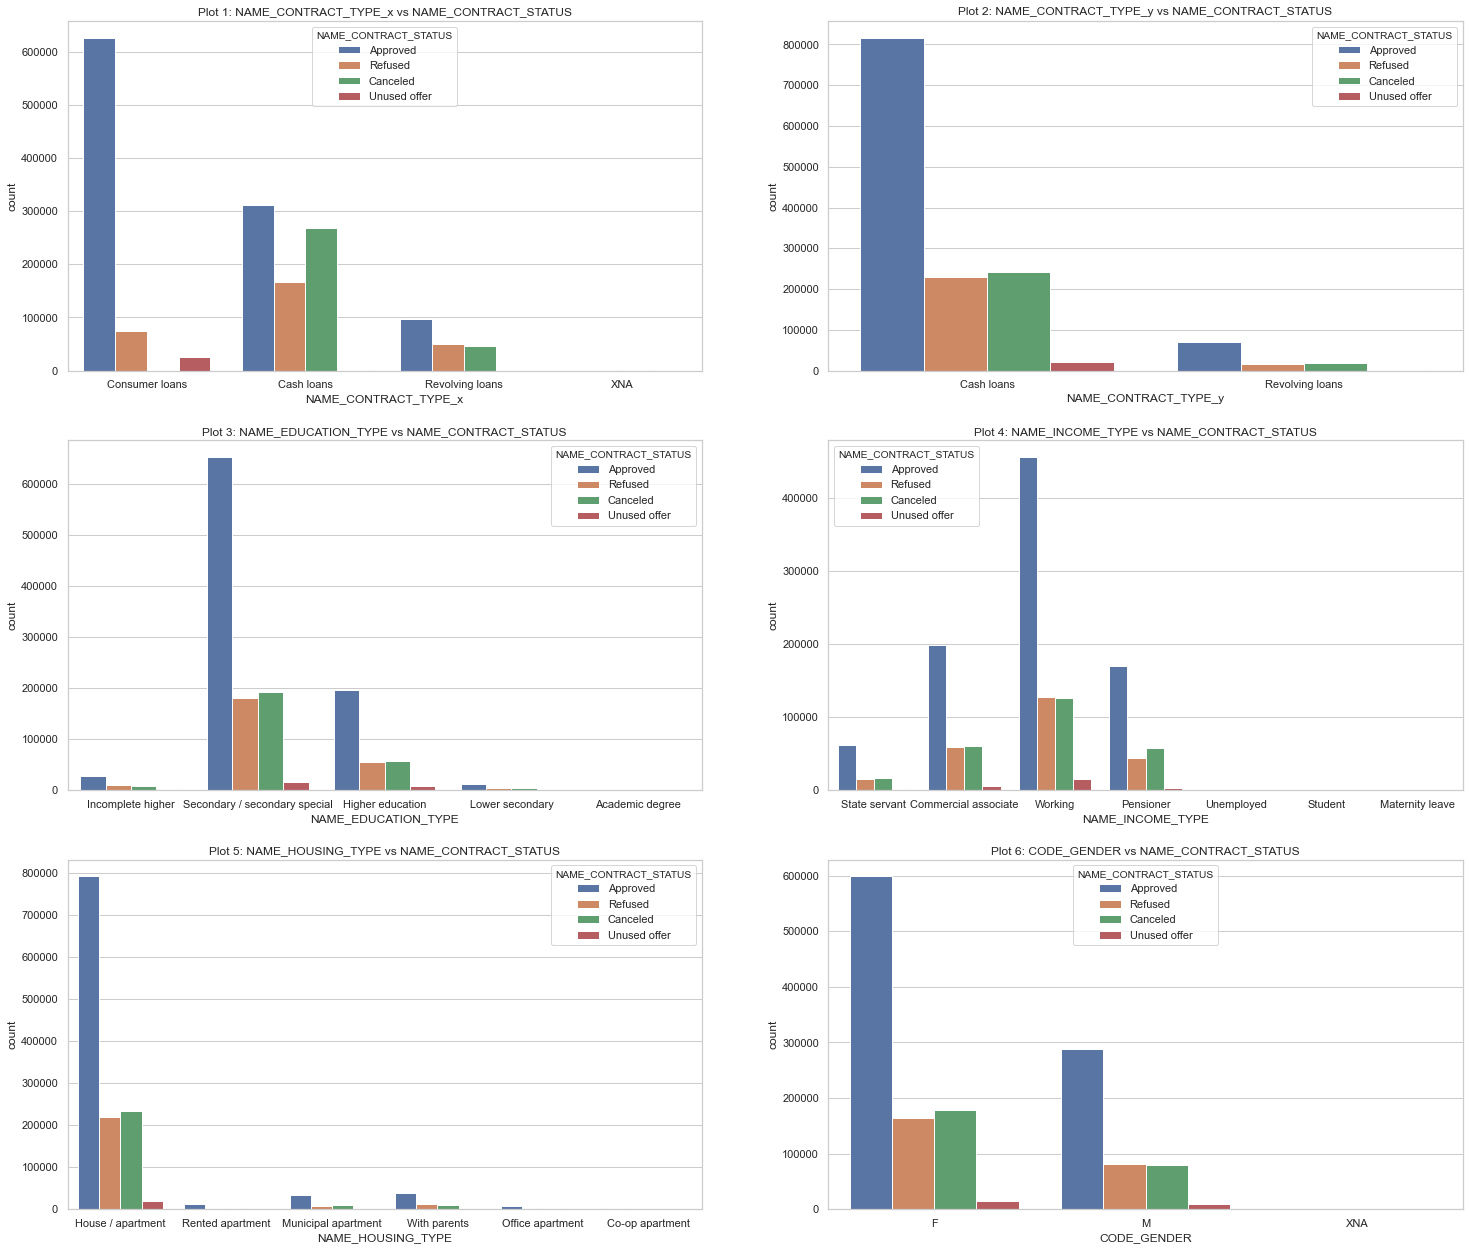

In [67]:
cat_cols = ['NAME_CONTRACT_TYPE_x', 'NAME_CONTRACT_TYPE_y','NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 
'NAME_HOUSING_TYPE', 'CODE_GENDER'];

rowCnt = len(cat_cols)
colCnt = 2
subCnt = 1 # initialize plot number

plt.figure(figsize = (25,45))
for col in (cat_cols):
    plt.subplot(rowCnt, colCnt, subCnt)
    plt.title('Plot '+str(subCnt)+ ': '+col + ' vs NAME_CONTRACT_STATUS')
    sns.countplot(x=col, hue='NAME_CONTRACT_STATUS', data= merge_df)
    subCnt = subCnt+1

###### Insights of each graphs draw above:

###### 1. Application Contract Status and Contract Type on merged data (Plot - 1)
- After merging both file data we see one new category Consumer loans is added which is not present in application data.
- Consumers loans were mainly approved.
- Mostly cash loans are refused or cancelled in comparative of consumer loans.
- Half of the Revolving loans were approved while half were cancelled or refused.

###### 2. Application Contract Status and Contract Type on application data (Plot - 2)
- In application data, approx 30% consumer loans were refused and cancelled while few of the approved loan applications were unused. 
- In application data, half of the Revolving loans were approved while half were cancelled and refused.

###### 3. Application Contract Status and Education Type (Plot -3)
- For secondary/secondary special data we have Highest approval as well as cancelled applications. 
- While count for unused offer is least or negligible for all education type.

###### 4. Application Contract Status and Income Type (Plot -4)
- Working people got most approval of their loan.
- Pensioners loan having most cancelled count.
- For unemployed, student and maternity leave count value is negligible.

###### 5. Application Contract Status and Housing Type (Plot -5)
- People living in home/apartment got most approval as well as cancellation and refusal.
- For others we have less amount of data is present.

###### 6. Application Contract Status and Gender (Plot -6)
- The ratio of female loan approved and cancelled is higher than male.
- There is almost same ratio for refused and cancelled application for male gender.

# Bivariate Analysis: Categorical - Continuous (Merge Data)

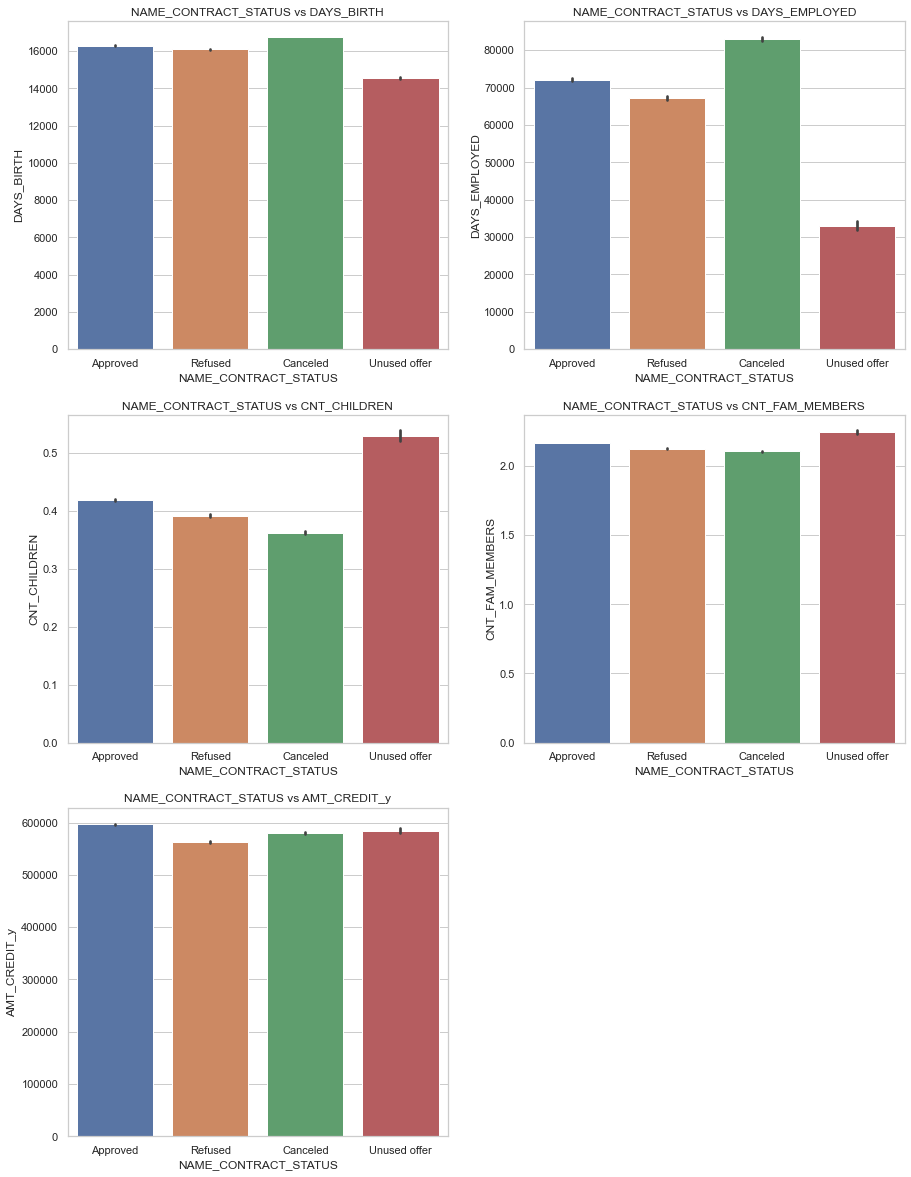

In [68]:
cols = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'AMT_CREDIT_y'];

rowCnt = len(cols)
colCnt = 2
subCnt = 1 # initialize plot number

plt.figure(figsize = (15,35))
for col in (cols):
    plt.subplot(rowCnt, colCnt, subCnt)
    plt.title('NAME_CONTRACT_STATUS vs '+ col)
    sns.barplot(merge_df.NAME_CONTRACT_STATUS, merge_df[col])
    subCnt = subCnt+1

###### Insights of each graphs draw above:

###### 1. NAME_CONTRACT_STATUS vs DAYS_BIRTH
- Count for cancelled application is highest.
- There is slight difference for approved and refused application.

###### 2. NAME_CONTRACT_STATUS vs DAYS_EMPLOYED
- Count for cancelled application is highest.
- The unused offer have least application count.
- The difference between approved and refused application is ~5000.

###### 3. NAME_CONTRACT_STATUS vs CNT_CHILDREN
- For maximum count child, application are under unused odder.
- For approved application, the maximum count child is 4+;
- There is slight difference for refused and cancelled application.

###### 4. NAME_CONTRACT_STATUS vs CNT_FAM_MEMBERS
- There is not much variance between the application status w.r.t. count of family member.
- The highest data lies under unused offer.

###### 5. NAME_CONTRACT_STATUS vs AMT_CREDIT
- The maximum amount credit limit is 6Lc which is for approved applications.
- The count for refused, canceled and unused offer is lie between 5.5Lc to less than 6Lc.
- The canceled and unused offer count is almost equal with a slight difference to refused application.

# Conclusion

- Application data has a total 121 columns, out of which 41 have more than 50% missing values. 
- Application data has data imbalance, 90% data is for target variable 0 and rest is for target 1.
- There were outliers in application data and the date and age column had negative values which were corrected.
- There are only two types(90% cash loans & 10% revolving loans) of loan in application data while previous data had consumer loan too.
- The application date has 65% females and 35% male. Out of total female and male applicants 7% female and 10% male applicants have defaulted.
- In application data 51% are working professionals, 23% arecommercial associates and 18% are pensioners. Out of total 9% working professionals, 7% working associates and 5 % pensioners have defaulted the loan.
- In application data 88%  live in houses/apartments,  4.8% with parents and 3.6% live in municipal apartments. Out of total approx 8% house/apartment applicants, 12% with parents  and 8.5 % in municipal apartments have defaulted the loan.
- 71% data belong to education type Secondary / secondary special, 24% Higher education and 3% Incomplete higher. Out of total 9% have education type Secondary / secondary special, 5% have Higher education and 8% have Incomplete higher education who default the loan.
- Approx 63% applicants are married, 15% are single and 9.6% have civil marriage. Out of total 7.5% married, 9.8% single and 10% civil marriage applicants do the loan default.
- Approx 72% are in avg, 20% low and 6% are in above_avg income group.  8% avg, 8% low and 6% above_avg income group do the loan default.  
- In application data 51% are laborers, 15% are sales staff and 13% are core staff. Out of total 10% laborers, 9.6% sales staff and 11 % drivers have defaulted the loan.
- In previous data, loan application was Approved: 62.1 % times, Cancelled: 18.9 % times, Refused: 17.4 % times  and Unused offer: 1.58 % times
- 77% of previous applications were repeated while only 18% were new applications.
- In the previous application, 46% applications were filed through credit & cash offices while 29.6% were filed country-wide.
